# **Gruppo 4 - The DAC side of the moon**

# Docs:
- [matplotlib](https://matplotlib.org/stable/)
- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

# Import librerie

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import math
from matplotlib.colors import LogNorm, ListedColormap
from copy import deepcopy
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Connessione a Google Drive e importazione dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/in_sdn_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet')
print("\nAnteprima dei dati (prime 10 righe):")
df.head()


Anteprima dei dati (prime 10 righe):


PL  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [60, 60, 52, 539, 52, 52, 52, 52, 52, 52, 52, ...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [60, 60, 52, 56, 52, 1500, 52, 1500, 52, 1500,...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                           [82, 44, 44, 44, 44, 44]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                           [82, 44, 44, 44, 44, 44]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                   [82, 44, 44, 44]   

                                                                                                  IAT  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [0, 45, 1268, 113, 21, 10101963, 17, 10241293,...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [0, 10237, 23, 9050, 13, 4352, 10, 58, 5, 48, ...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...      [0, 70, 3992308, 5999852, 12199941, 24000545]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...      [0, 28, 4391754, 5999959, 12000697, 24199353]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                          [0, 86, 3188545, 5999748]   

                                                                                                  DIR  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....            [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                                 [0, 1, 1, 1, 1, 1]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                                 [0, 1, 1, 1, 1, 1]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                       [0, 1, 1, 1]   

                                                                                                  WIN  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [64240, 28960, 502, 502, 59, 502, 59, 502, 59,...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [29200, 65160, 58, 510, 58, 510, 63, 510, 69, ...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                 [64, 5840, 5840, 5840, 5840, 5840]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                 [64, 5840, 5840, 5840, 5840, 5840]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                             [64, 5840, 5840, 5840]   

                                                                                                  FLG  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [2, 18, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [2, 18, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                            [2, 18, 18, 18, 18, 18]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                            [2, 18, 18, 18, 18, 18]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                    [2, 18, 18, 18]   

                                                                                                  TTL  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [63, 64, 63, 63, 64, 63, 64, 63, 64, 63, 64, 6...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [64, 63, 64, 63, 64, 63, 64, 63, 64, 63, 64, 6...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                           [63, 64, 64, 64, 64, 64]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                           [63, 64, 64, 64, 64, 64]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                   [63, 64, 64, 64]   

                                                                                                  NET  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [69, 0, 0, 60, 125, 252, 64, 0, 63, 6, 70, 123...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [69, 0, 0, 60, 12, 142, 64, 0, 64, 6, 182, 233...  

In [ ]:
for i in df.index.str.contains('41.43.55.199'):
  if i == True:
    print(i)

True


# Verifica GPU

In [ ]:
print("Num GPUs Available: ", torch.cuda.device_count())

Num GPUs Available:  0


# Overview Dataset

**Tabella features:**

| Colonna   | Significato                                                                 |
|-----------|-----------------------------------------------------------------------------|
| **PL**    | Payload Length – lunghezza del payload del pacchetto (in byte).              |
| **IAT**   | Inter-Arrival Time – tempo tra l’arrivo di un pacchetto e il successivo.   |
| **DIR**   | Direction – direzione del pacchetto (0 = entrata, 1 = uscita, ecc.).         |
| **WIN**   | Window Size – dimensione della finestra TCP (flow control).                 |
| **FLG**   | Flags – flag TCP codificati (es. SYN, ACK, FIN, ecc. in forma numerica).    |
| **TTL**   | Time To Live – numero di hop residui (metrica tipica del layer IP).          |
| **NET**   | Network distance – distanza (in hop o IP mask) della sorgente dal target.    |
| **NET-OBF** | Network obfuscation – misura di offuscamento (es. NAT, spoofing IP).       |
| **FEAT_PAD**| Feature Padding – valori riempitivi se mancano pacchetti (padding feature-level).|
| **LOAD_PAD**| Load Padding – padding sulla lunghezza dei pacchetti (es. per mascherare).   |



In [ ]:
# Stampa informazioni aggiuntive sul file
print(f"- Numero di righe: {df.shape[0]}")
print(f"- Numero di colonne: {df.shape[1]}")
print("- Schema delle colonne:")
print(df.dtypes)

- Numero di righe: 257728
- Numero di colonne: 14
- Schema delle colonne:
PL            object
IAT           object
DIR           object
WIN           object
FLG           object
TTL           object
NET           object
NET-OBF       object
LABEL         object
LABEL-bin      int64
LABEL_FULL    object
FEAT_PAD       int64
LOAD_PAD       int64
Filename      object
dtype: object


| **Etichetta**     | **Tipo di Attacco**         | **Descrizione**                                                                                                                                         | **Metodo di Simulazione nel dataset inSDN**                                                                                       |
|-------------------|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| DDoS_icmp         | DDoS (ICMP Flood)           | Attacco distribuito che invia un alto volume di pacchetti ICMP Echo Request per saturare la banda o la CPU del bersaglio.                               | Generato utilizzando più host compromessi che inviano pacchetti ICMP Echo Request simultaneamente verso il bersaglio.             |
| Probe             | Scansione di rete           | Attività di ricognizione per identificare porte aperte o servizi attivi su host target.                                                                 | Eseguito con strumenti come `nmap` per effettuare port scanning attivo e passivo su vari host nella rete.                         |
| Normal            | Traffico legittimo          | Traffico di rete normale e benigno, inclusi accessi a servizi comuni come HTTP, HTTPS, DNS, Email, FTP e SSH.                                           | Generato da utenti legittimi o script che simulano attività quotidiane su vari servizi di rete.                                  |
| DoS_hulk          | DoS (HTTP Flood - HULK)     | Attacco che invia un gran numero di richieste HTTP uniche e dinamiche (per evitare meccanismi di caching e mitigazioni) per saturare le risorse del server web.                                                       | `HULK` e `torshammer tools`.             |
| DoS_http          | DoS (HTTP Flood)            | Invio massivo di richieste HTTP GET/POST per sovraccaricare il server web.                                                                              | Eseguito con strumenti come `slowhttptest` o script personalizzati per inviare richieste HTTP in loop continuo.                   |
| BFA               | Brute Force Attack          | Tentativi ripetuti di accesso a servizi protetti (es. SSH, FTP) utilizzando combinazioni di username e password.                                        | Eseguito con strumenti come `Hydra` o la `Burp Suite` per effettuare tentativi di login automatizzati su servizi target.                 |
| DDoS_syn          | DDoS (SYN Flood)            | Attacco distribuito che invia pacchetti TCP SYN senza completare l'handshake, esaurendo le risorse del server.                                          | Generato da più host che inviano pacchetti TCP SYN con IP spoofed verso il server, senza completare l'handshake.                 |
| DoS_syn           | DoS (SYN Flood)             | Simile al DDoS_syn, ma l'attacco proviene da una singola sorgente.                                                                                      | Inviati pacchetti TCP SYN con IP spoofed da un singolo host verso il server target.                                               |
| DoS_slowloris     | DoS (Slowloris)             | Mantiene aperte molte connessioni HTTP incomplete per esaurire le risorse del server.                                                                   | Con `Slowloris`, che invia intestazioni HTTP incomplete a intervalli regolari per mantenere le connessioni aperte.   |
| Web-Attack        | Attacco Web generico        | Include attacchi come XSS, SQL injection, path traversal, ecc.                                                                                          | Realizzato tramite strumenti automatici come OWASP ZAP o SQLMap per eseguire vari attacchi web su applicazioni vulnerabili.      |
| BOTNET            | Traffico da botnet          | Rappresenta il traffico generato da dispositivi compromessi che comunicano con server di comando e controllo (C&C). L'intrusore può controllare diversi dispositivi "infetti" per rubare informazioni, lanciare attacchi DDoS ecc...                                      | Simulato generando traffico tipico di botnet, inclusi comandi C&C, scansioni di rete e attacchi coordinati. Ci sono due host infetti (h1 e h2) ed un attaccante con il tool `Ares` da una macchina Kali.                        |
| DoS_udp           | DoS (UDP Flood)             | Invio massivo di pacchetti UDP a porte casuali per saturare le risorse del server.                                                                      | Generato con script che inviano pacchetti UDP con payload casuali verso porte random del server target.                           |

In [ ]:
classes_normali = df['LABEL'].unique()
print(classes_normali)

print(df['LABEL'].value_counts())
print("\n")

classes = df['LABEL_FULL'].unique()
print(classes)

print(df['LABEL_FULL'].value_counts())

['Web-Attack' 'DDoS' 'DoS' 'BFA' 'Normal' 'Probe' 'BOTNET']
LABEL
DDoS          121831
Probe          73615
Normal         39296
DoS            21243
BFA             1405
Web-Attack       174
BOTNET           164
Name: count, dtype: int64


['Web-Attack' 'DDoS_syn' 'DoS_http' 'BFA' 'Normal' 'DoS_syn' 'Probe'
 'DoS_slowloris' 'DDoS_icmp' 'DoS_udp' 'BOTNET' 'DoS_hulk']
LABEL_FULL
DDoS_icmp        121331
Probe             73615
Normal            39296
DoS_hulk          15205
DoS_http           5302
BFA                1405
DDoS_syn            500
DoS_syn             380
DoS_slowloris       306
Web-Attack          174
BOTNET              164
DoS_udp              50
Name: count, dtype: int64


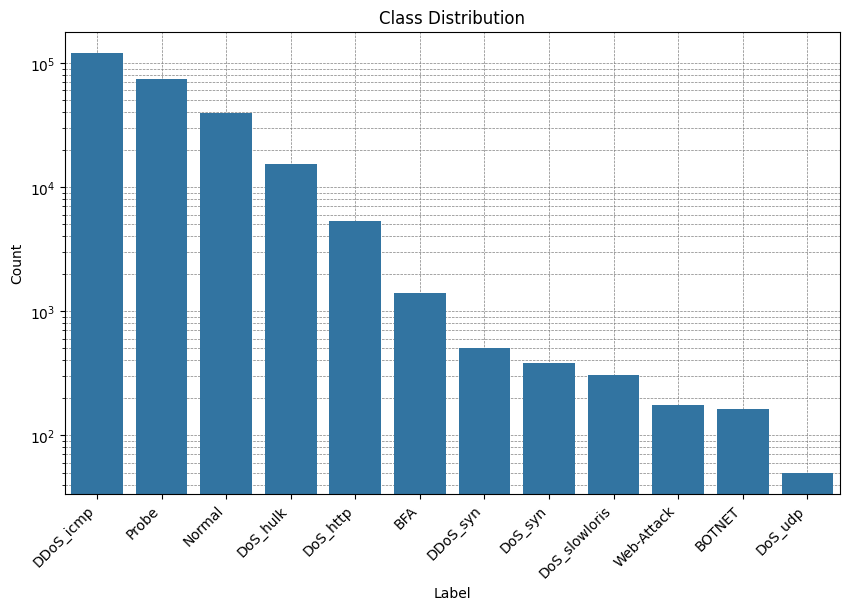

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
sns.countplot(x='LABEL_FULL', data=df, order=df['LABEL_FULL'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.yscale('log', base=10)
plt.grid(ls='--',lw = 0.5, c = 'grey', which='both')
plt.savefig('class_distribution.png')
ax.set_axisbelow(True)
plt.show()

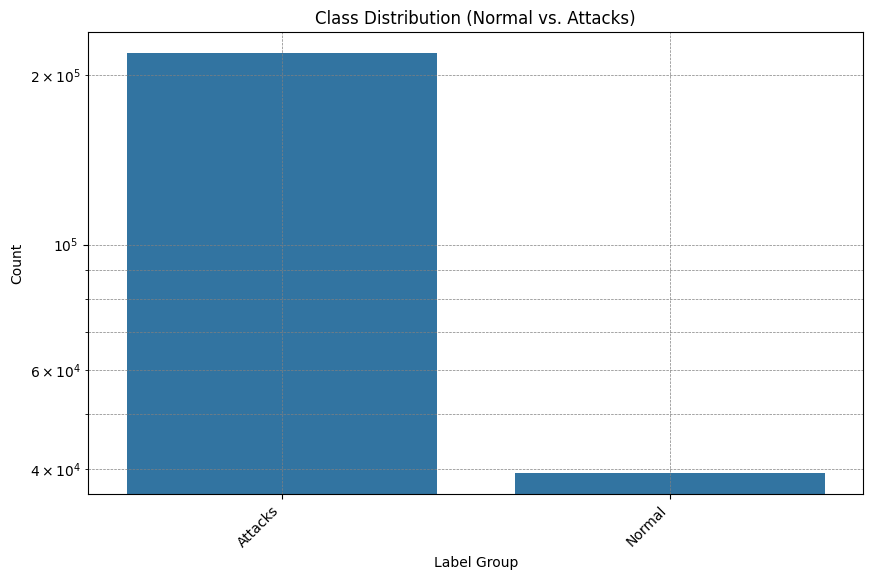

Total: 257728
Normal: 39296 (15.25%)
Attacks: 218432 (84.75%)


In [ ]:
df['LABEL_GROUP'] = 'Attacks'
df.loc[df['LABEL_FULL'] == 'Normal', 'LABEL_GROUP'] = 'Normal'

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='LABEL_GROUP', data=df, order=df['LABEL_GROUP'].value_counts().index)
plt.title('Class Distribution (Normal vs. Attacks)')
plt.xlabel('Label Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.yscale('log', base=10)  # log scale for better visualization
plt.grid(ls='--', lw=0.5, c='grey', which='both')
plt.savefig('class_distribution_normal_vs_others.png')
plt.show()



total_count = len(df)
normal_count = len(df[df['LABEL_GROUP'] == 'Normal'])
other_count = total_count - normal_count

print(f"Total: {total_count}")
print(f"Normal: {normal_count} ({normal_count/total_count*100:.2f}%)")
print(f"Attacks: {other_count} ({other_count/total_count*100:.2f}%)")

<ipython-input-10-684eadd17e7c>:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


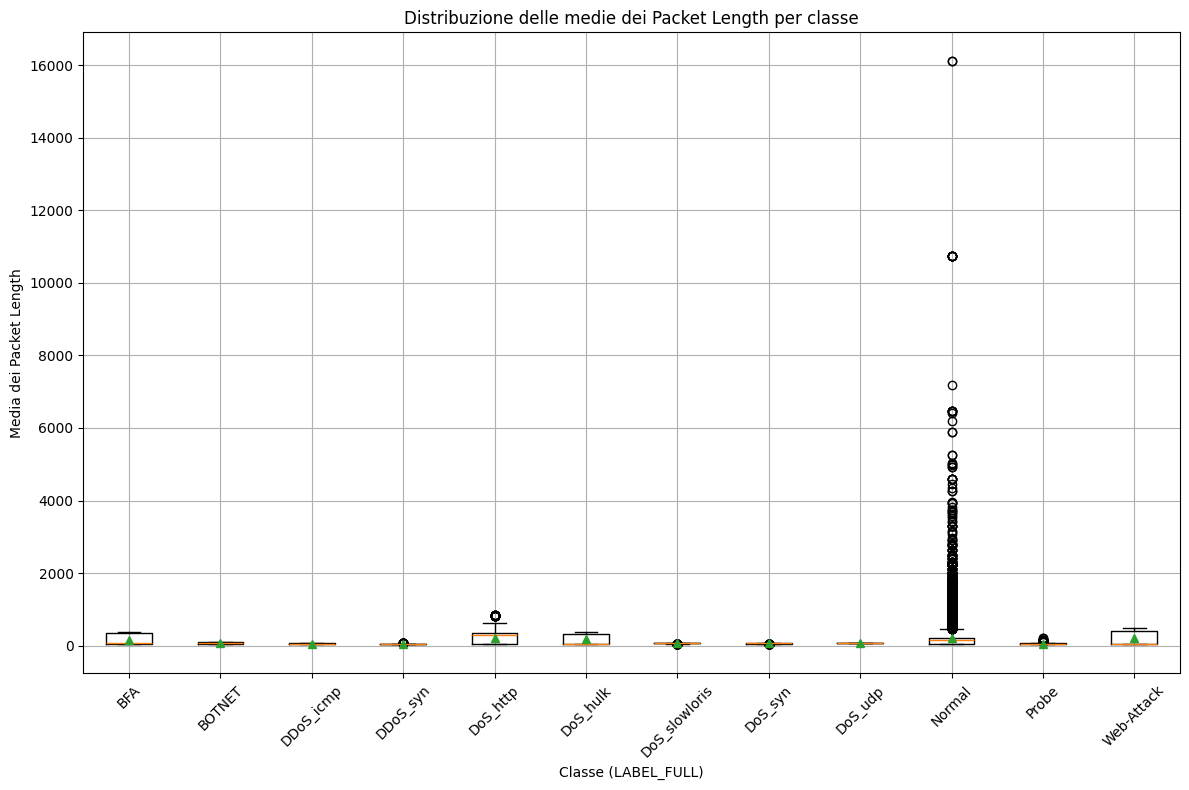

<ipython-input-10-684eadd17e7c>:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


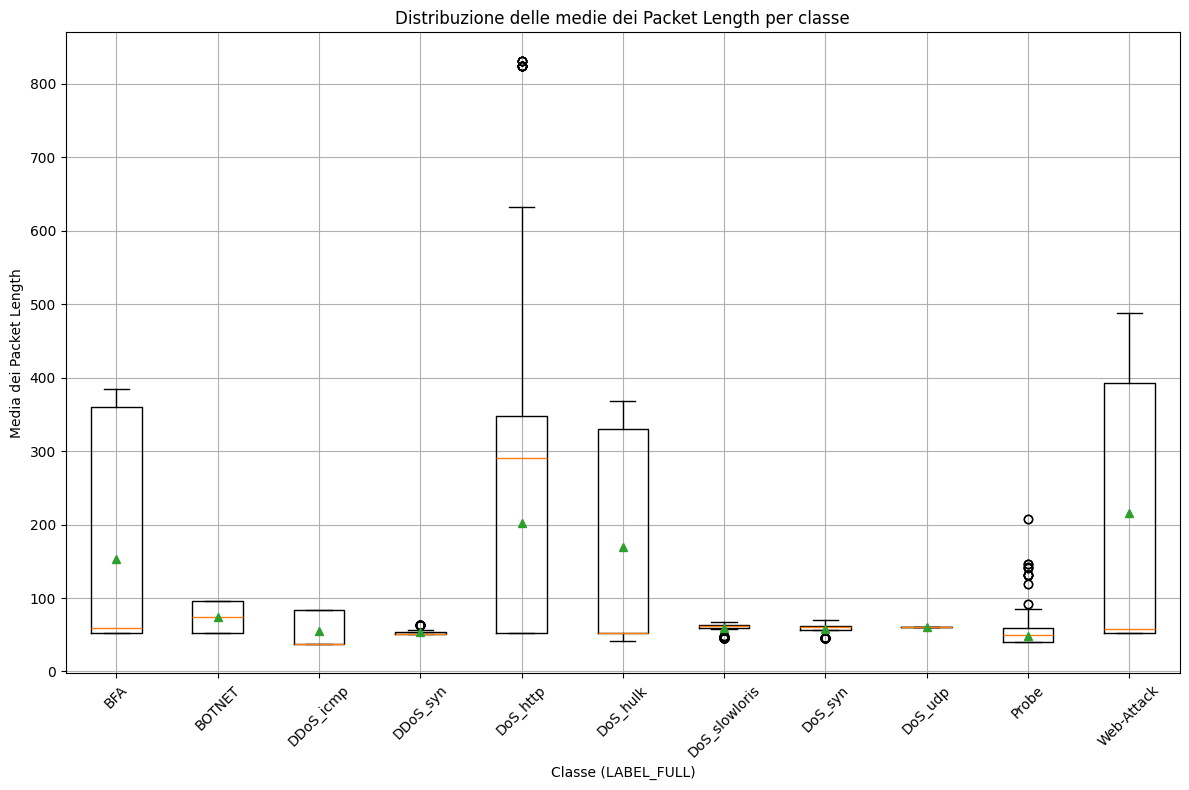

In [ ]:
def preprocess_packet_lengths(df, max_length=20):
    """
    Preprocessa la colonna 'PL' per garantire che ogni array abbia esattamente max_length elementi.
    Riempie con NaN se l'array è più corto.
    """
    def pad_or_truncate(pl_array):
        # Converte l'array in float per supportare NaN
        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length: #Se più lungo tronco a 20
            return pl_array[:max_length]
        else: #Se più corto fillo con NaN
            return np.pad(pl_array, (0, max_length - len(pl_array)), constant_values=np.nan)

    df['PL_processed'] = df['PL'].apply(pad_or_truncate)
    return df

def calculate_mean_packet_lengths(df, pl_column='PL_processed'):
    """
    Calcola la media dei packet length per ogni riga.
    """
    df['PL_mean'] = df[pl_column].apply(np.nanmean)  # Calcola la media ignorando i NaN
    return df

def create_boxplots(df, label_column='LABEL_FULL', mean_column='PL_mean', nome = ''):
    """
    Crea un unico boxplot per la distribuzione delle medie dei packet length,
    con ogni classe ('LABEL_FULL') sull'asse X.
    """
    # Raggruppa i dati per 'LABEL_FULL' e raccogli le medie
    grouped = df.groupby(label_column)[mean_column].apply(list)

    # Prepara i dati per il boxplot
    labels = grouped.index.tolist()
    data = grouped.tolist()

    # Crea il boxplot
    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.title("Distribuzione delle medie dei Packet Length per classe")
    plt.xlabel("Classe (LABEL_FULL)")
    plt.ylabel("Media dei Packet Length")
    plt.xticks(rotation=45)  # Ruota le etichette sull'asse X per leggibilità
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(nome+'.png')
    plt.show()


def boxplotta(df, nome):
    df = preprocess_packet_lengths(df)

    # Calcola la media dei packet length
    df = calculate_mean_packet_lengths(df)



    # Crea i boxplot
    create_boxplots(df, nome = nome)

df['PL'] = df['PL'].apply(lambda x: x[:10])
boxplotta(df, 'boxplot')

df_normaldrop = df.drop(df[df['LABEL_FULL'] == 'Normal'].index)
boxplotta(df_normaldrop, 'boxplot_no_normal')


Elaborazione feature: PL...


<ipython-input-11-eae6a7921334>:27: RuntimeWarning: Mean of empty slice
  class_means[label] = np.nanmean(matrix, axis=0)


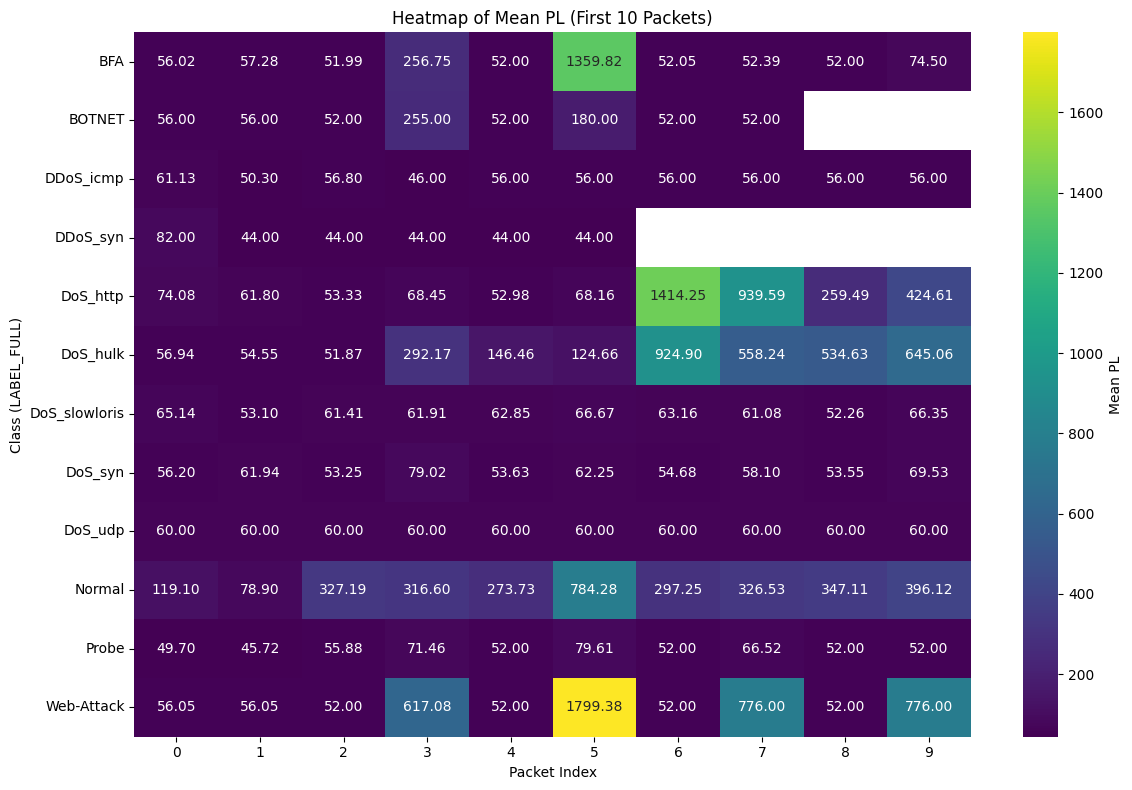

Heatmap salvata per PL in heatmaps/heatmap_PL.png

Elaborazione feature: IAT...


<ipython-input-11-eae6a7921334>:27: RuntimeWarning: Mean of empty slice
  class_means[label] = np.nanmean(matrix, axis=0)


Valori non validi per LogNorm nella feature 'IAT' (min=0.0).


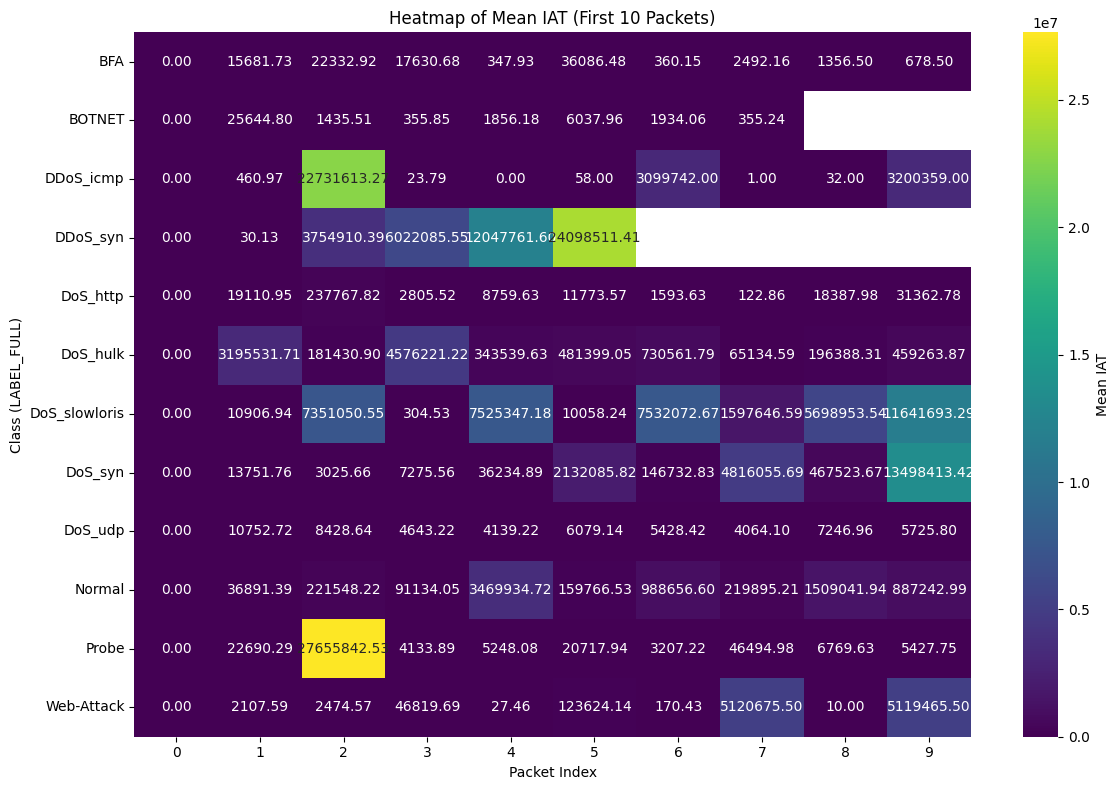

Heatmap salvata per IAT in heatmaps/heatmap_IAT.png

Elaborazione feature: DIR...


<ipython-input-11-eae6a7921334>:27: RuntimeWarning: Mean of empty slice
  class_means[label] = np.nanmean(matrix, axis=0)


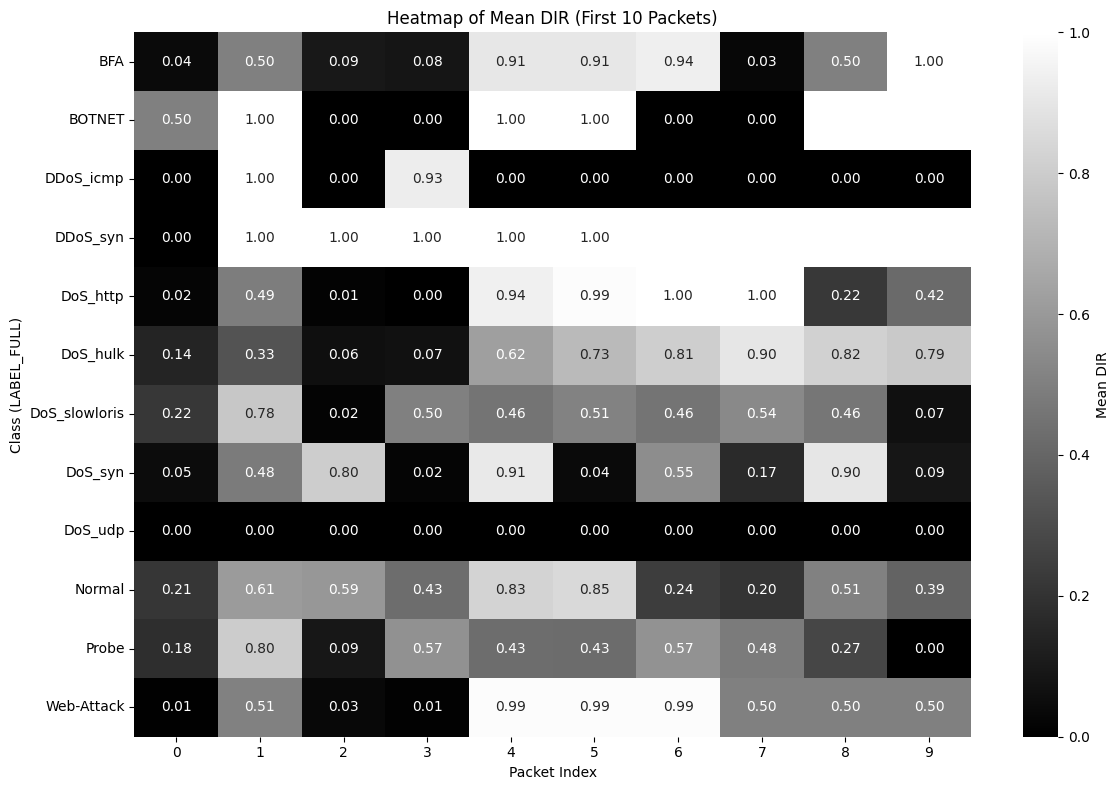

Heatmap salvata per DIR in heatmaps/heatmap_DIR.png

Elaborazione feature: WIN...


<ipython-input-11-eae6a7921334>:27: RuntimeWarning: Mean of empty slice
  class_means[label] = np.nanmean(matrix, axis=0)


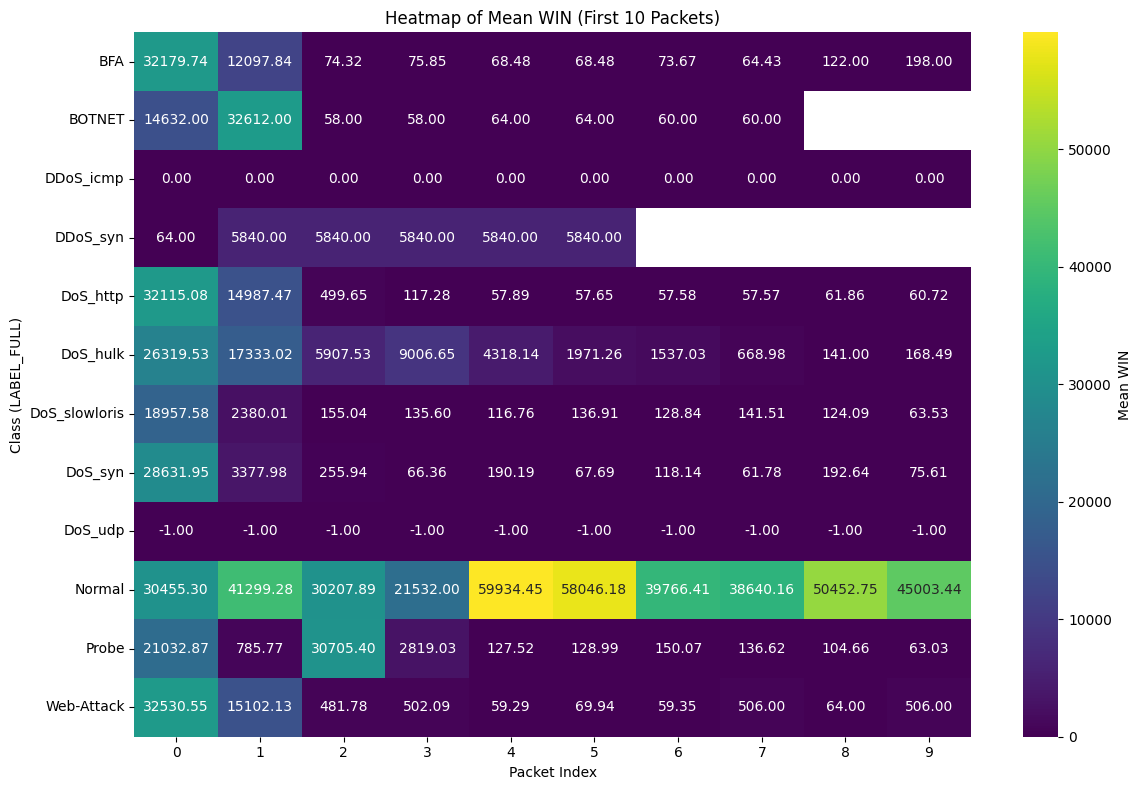

Heatmap salvata per WIN in heatmaps/heatmap_WIN.png

Elaborazione feature: FLG...


<ipython-input-11-eae6a7921334>:27: RuntimeWarning: Mean of empty slice
  class_means[label] = np.nanmean(matrix, axis=0)


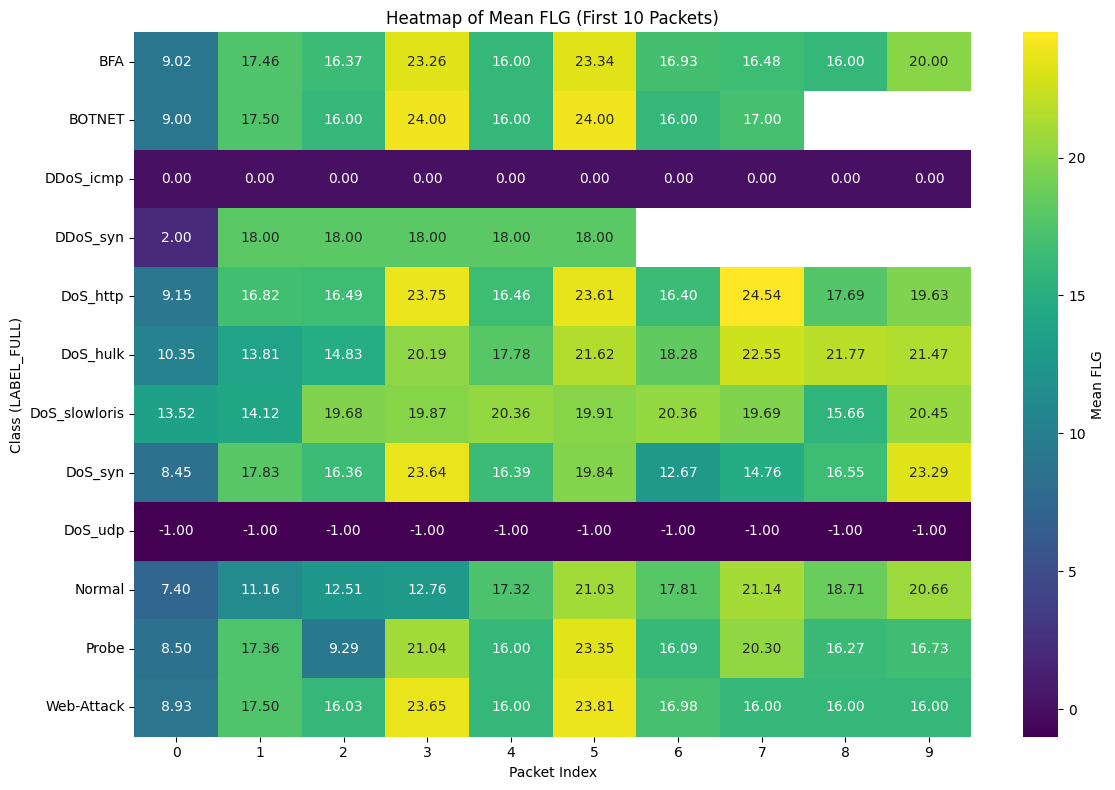

Heatmap salvata per FLG in heatmaps/heatmap_FLG.png

Elaborazione feature: TTL...


<ipython-input-11-eae6a7921334>:27: RuntimeWarning: Mean of empty slice
  class_means[label] = np.nanmean(matrix, axis=0)


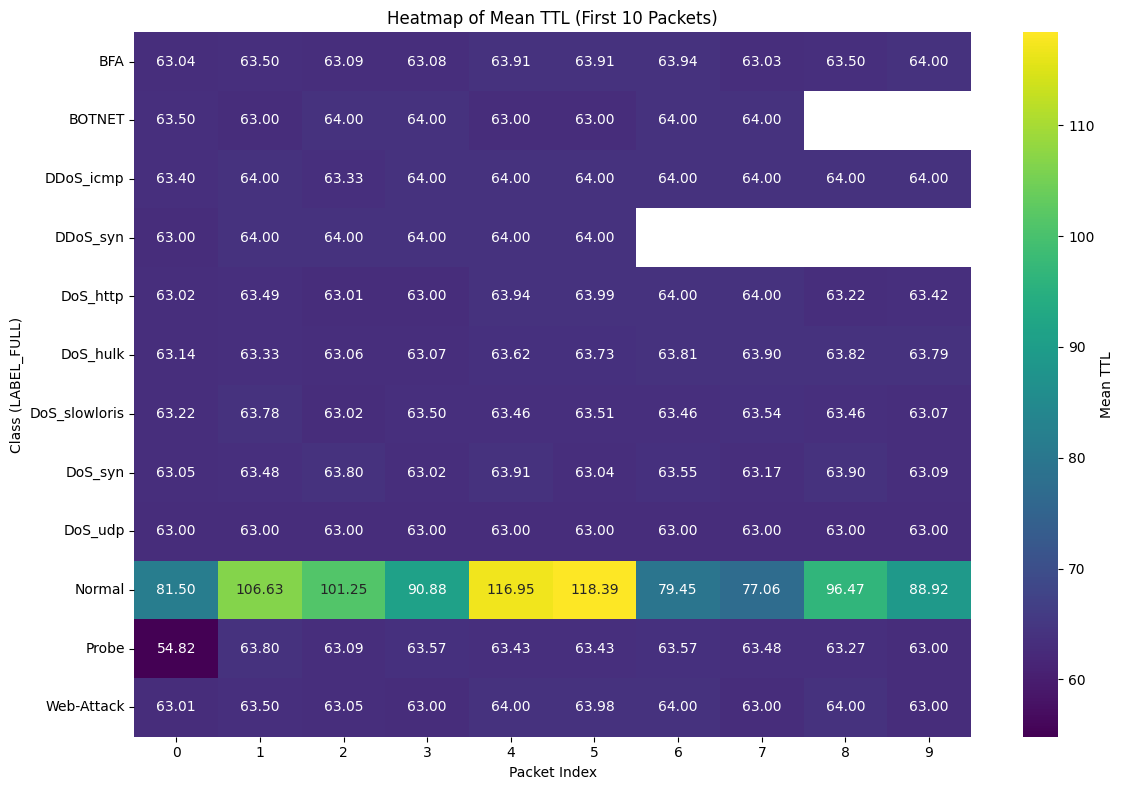

Heatmap salvata per TTL in heatmaps/heatmap_TTL.png

Elaborazione feature: NET...


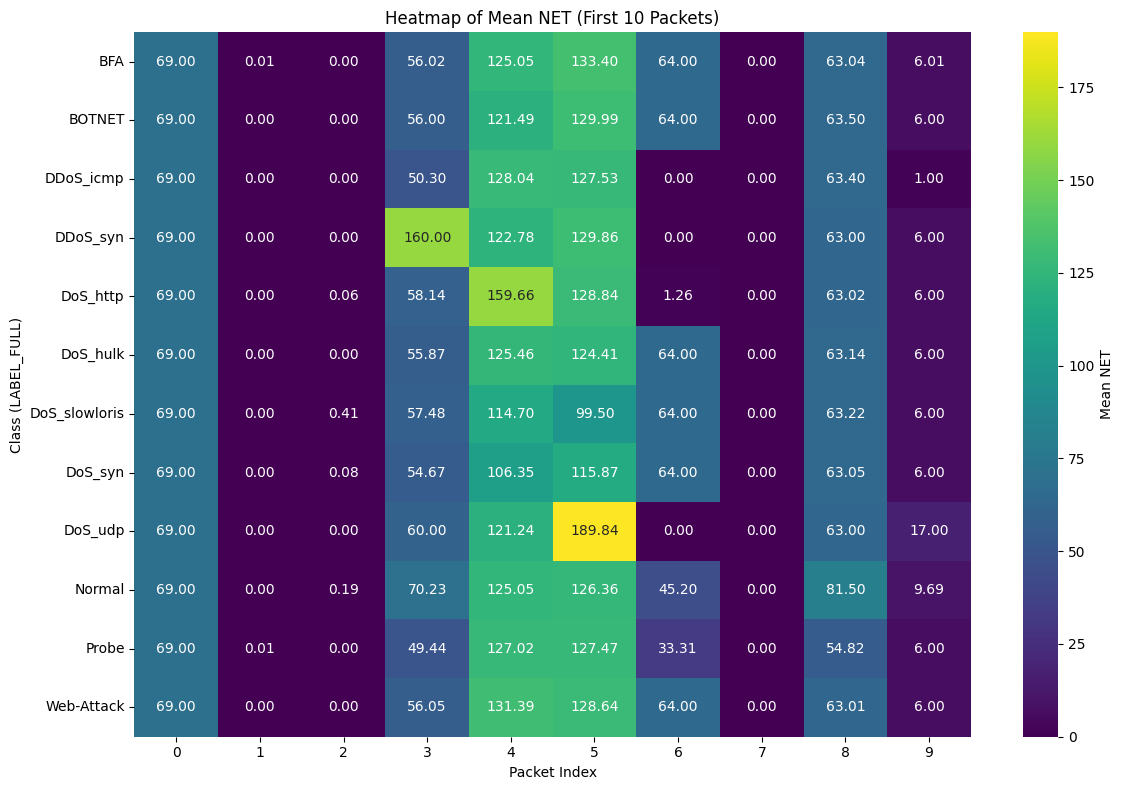

Heatmap salvata per NET in heatmaps/heatmap_NET.png

Elaborazione feature: NET-OBF...


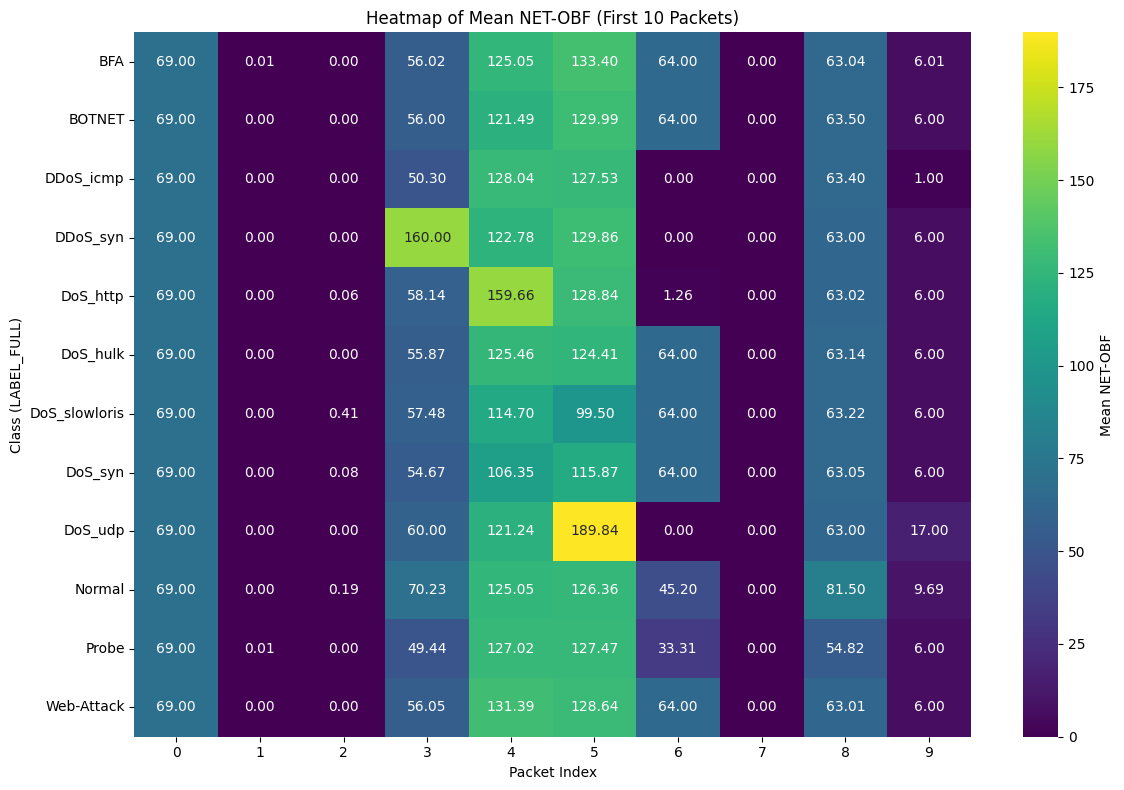

Heatmap salvata per NET-OBF in heatmaps/heatmap_NET-OBF.png

Elaborazione feature: FEAT_PAD...
Attenzione: La colonna 'FEAT_PAD' non sembra contenere array/liste. Contiene: <class 'numpy.int64'>. Salto.
Assicurati che le colonne feature contengano array di valori numerici.

Elaborazione feature: LOAD_PAD...
Attenzione: La colonna 'LOAD_PAD' non sembra contenere array/liste. Contiene: <class 'numpy.int64'>. Salto.
Assicurati che le colonne feature contengano array di valori numerici.

Elaborazione completata.


In [ ]:
# --- Configurazione ---
LABEL_COLUMN = 'LABEL_FULL' # Colonna usata per raggruppare (le classi)
FEATURE_COLUMNS = ['PL', 'IAT', 'DIR', 'WIN', 'FLG', 'TTL', 'NET', 'NET-OBF', 'FEAT_PAD', 'LOAD_PAD']
NUM_PACKETS = 10 # Numero di pacchetti iniziali da considerare
OUTPUT_DIR = 'heatmaps' # Directory dove salvare le heatmap


def preprocess_and_calculate_means(df, feature_col, label_col, num_packets):
    def get_first_n_packets(arr):
        if arr is None:
            return np.full(num_packets, np.nan)
        if isinstance(arr, (list, np.ndarray)):
            arr_np = np.array(arr, dtype=float)
            if len(arr_np) < num_packets:
                return np.pad(arr_np, (0, num_packets - len(arr_np)), 'constant', constant_values=np.nan)
            return arr_np[:num_packets]
        return np.full(num_packets, np.nan)

    df_feature = df[[label_col, feature_col]].copy()
    df_feature['truncated_feature'] = df_feature[feature_col].apply(get_first_n_packets)

    class_means = {}
    for label, group in df_feature.groupby(label_col):
        arrays = [arr for arr in group['truncated_feature'] if isinstance(arr, np.ndarray) and not np.all(np.isnan(arr))]
        if len(arrays) > 0:
            matrix = np.vstack(arrays)
            class_means[label] = np.nanmean(matrix, axis=0)
        else:
            class_means[label] = np.full(num_packets, np.nan)

    heatmap_data = pd.DataFrame.from_dict(class_means, orient='index', columns=[f'Packet_{i}' for i in range(num_packets)])
    return heatmap_data

def plot_heatmap(data_df, feature_name, output_dir):
    if data_df.empty:
        print(f"Nessun dato da plottare per la feature: {feature_name}")
        return

    plt.figure(figsize=(12, max(8, len(data_df.index) * 0.5)))

    from matplotlib.colors import ListedColormap, Normalize
    cmap = sns.color_palette("viridis", as_cmap=True)
    cmap_with_nan = ListedColormap(cmap(np.linspace(0, 1, 256)))
    cmap_with_nan.set_bad(color='white')   # NaN (padding) = bianco
    cmap_with_nan.set_under(color='#d0d0d0')  # Zeri = grigio chiaro

    norm = None
    if feature_name == "DIR":
        cmap_with_nan = ListedColormap(plt.get_cmap("gray")(np.linspace(0, 1, 256)))
        cmap_with_nan.set_bad(color='white')
    elif feature_name == "IAT":
        # LogNorm per valori positivi
        data_positive = data_df[data_df >= 0]
        vmin = data_positive.min().min()
        vmax = data_positive.max().max()
        if pd.notna(vmin) and pd.notna(vmax) and vmin > 0:
            norm = LogNorm(vmin=vmin, vmax=vmax)
        else:
            print(f"Valori non validi per LogNorm nella feature '{feature_name}' (min={vmin}).")
            norm = None

    # Mask separata solo per NaN
    mask_nan = data_df.isna()

    ax = sns.heatmap(
        data_df,
        annot=True,
        fmt=".2f",
        cmap=cmap_with_nan,
        cbar_kws={'label': f'Mean {feature_name}'},
        norm=norm,
        mask=mask_nan
    )

    plt.title(f'Heatmap of Mean {feature_name} (First {NUM_PACKETS} Packets)')
    plt.xlabel('Packet Index')
    plt.ylabel('Class (LABEL_FULL)')
    plt.xticks(ticks=np.arange(NUM_PACKETS) + 0.5, labels=np.arange(NUM_PACKETS))
    plt.tight_layout()

    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, f'heatmap_{feature_name}.png')
    plt.savefig(filepath)
    plt.show()
    print(f"Heatmap salvata per {feature_name} in {filepath}")


for feature in FEATURE_COLUMNS:
    print(f"\nElaborazione feature: {feature}...")
    if feature not in df.columns:
        print(f"Attenzione: La colonna feature '{feature}' non è presente nel DataFrame. Salto.")
        continue

    # Controlla se la colonna feature contiene effettivamente dati iterabili (liste/array)
    # Prendi un campione non nullo per il controllo del tipo
    sample_value = df[feature].dropna().iloc[0] if not df[feature].dropna().empty else None
    if sample_value is None or not isinstance(sample_value, (list, np.ndarray, pd.Series)):
          print(f"Attenzione: La colonna '{feature}' non sembra contenere array/liste. Contiene: {type(sample_value)}. Salto.")
          print("Assicurati che le colonne feature contengano array di valori numerici.")
          continue

    heatmap_df = preprocess_and_calculate_means(df, feature, LABEL_COLUMN, NUM_PACKETS)

    if not heatmap_df.empty:
        plot_heatmap(heatmap_df, feature, OUTPUT_DIR)
    else:
        print(f"Nessun dato per la heatmap generato per la feature: {feature}")

print("\nElaborazione completata.")

Dimensioni dei dataset:
X_train: (206182, 80), y_train: (206182,)
X_test: (51546, 80), y_test: (51546,)

Addestramento del Random Forest Classifier...

Accuracy: 0.9981
F1 Score (macro): 0.9389
F1 Score (weighted): 0.9980

Report di classificazione:
               precision    recall  f1-score   support

          BFA       0.98      0.87      0.92       281
       BOTNET       1.00      1.00      1.00        33
    DDoS_icmp       1.00      1.00      1.00     24266
     DDoS_syn       1.00      1.00      1.00       100
     DoS_http       1.00      1.00      1.00      1061
     DoS_hulk       1.00      1.00      1.00      3041
DoS_slowloris       0.77      0.97      0.86        61
      DoS_syn       0.88      0.39      0.55        76
      DoS_udp       1.00      1.00      1.00        10
       Normal       1.00      1.00      1.00      7859
        Probe       1.00      1.00      1.00     14723
   Web-Attack       0.92      0.97      0.94        35

     accuracy                    

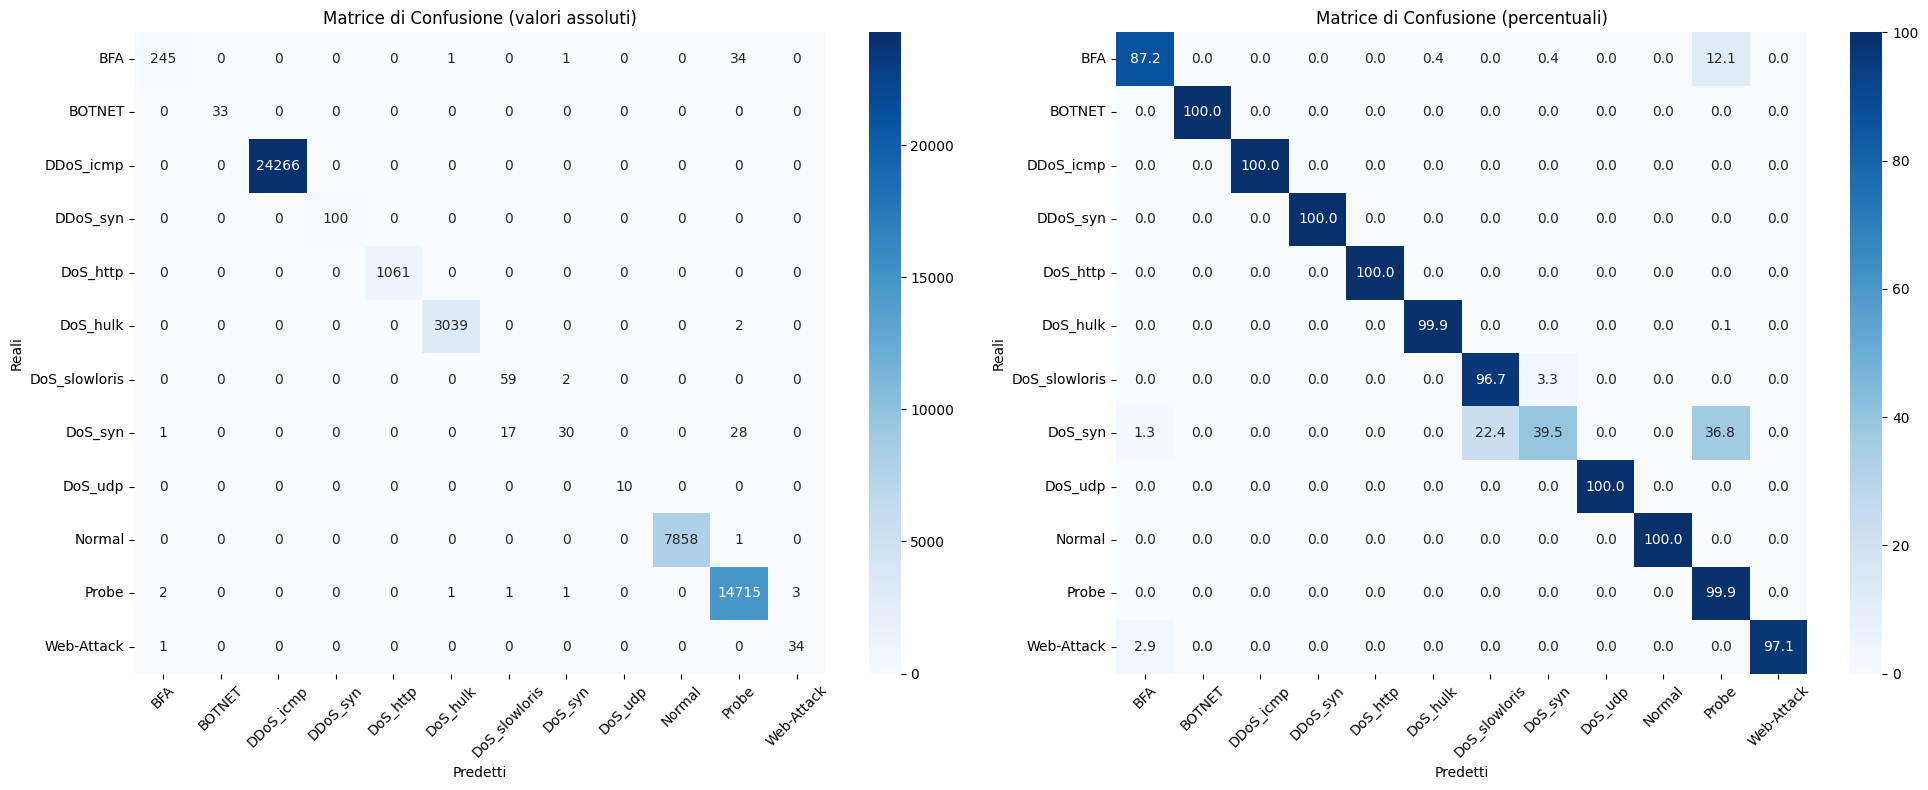


Top 20 Feature Importances:
      feature  importance
41      FLG_1    0.087720
69      NET_9    0.086406
40      FLG_0    0.083618
79  NET-OBF_9    0.067655
30      WIN_0    0.055529
31      WIN_1    0.049528
51      TTL_1    0.040921
73  NET-OBF_3    0.039312
12      IAT_2    0.036136
1        PL_1    0.032369
76  NET-OBF_6    0.031216
68      NET_8    0.029938
11      IAT_1    0.029251
50      TTL_0    0.028842
66      NET_6    0.024373
32      WIN_2    0.020239
78  NET-OBF_8    0.019884
63      NET_3    0.017553
52      TTL_2    0.017388
2        PL_2    0.016956


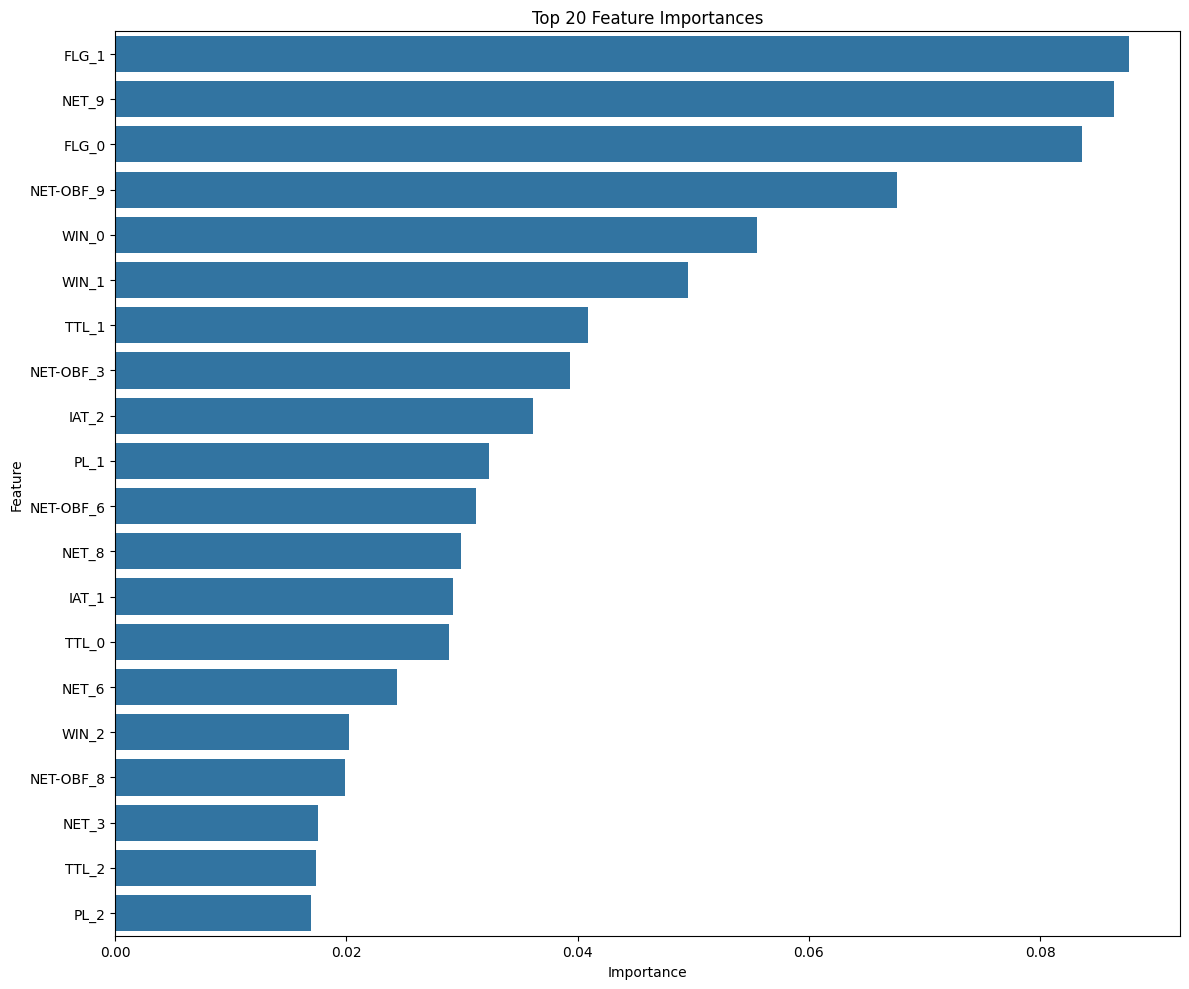

In [ ]:
# ---------------- CONFIGURAZIONE ----------------
array_features_to_use = ['PL', 'IAT', 'DIR', 'WIN', 'FLG', 'TTL', 'NET', 'NET-OBF']
num_elements_to_use = 10
include_FEAT_PAD = False
include_LOAD_PAD = False
target_column = 'LABEL_FULL'

# ---------------- ESTRAZIONE FEATURE ----------------
X = pd.DataFrame()

def extract_elements(arr, n):
    if arr is None or not isinstance(arr, (list, np.ndarray)):
        return [np.nan] * n
    arr_np = np.array(arr, dtype=float)
    if len(arr_np) < n:
        return np.pad(arr_np, (0, n - len(arr_np)), 'constant', constant_values=np.nan).tolist()
    return arr_np[:n].tolist()

for feature in array_features_to_use:
    if feature in df.columns:
        extracted_data = df[feature].apply(lambda x: extract_elements(x, num_elements_to_use))
        for i in range(num_elements_to_use):
            X[f'{feature}_{i}'] = extracted_data.apply(lambda x: x[i])

if include_FEAT_PAD and 'FEAT_PAD' in df.columns:
    X['FEAT_PAD'] = df['FEAT_PAD']

if include_LOAD_PAD and 'LOAD_PAD' in df.columns:
    X['LOAD_PAD'] = df['LOAD_PAD']

# ---------------- TARGET E IMPUTAZIONE ----------------
y = df[target_column]

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ---------------- SPLIT E NORMALIZZAZIONE ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dimensioni dei dataset:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# ---------------- MODELLO ----------------
print("\nAddestramento del Random Forest Classifier...")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# ---------------- VALUTAZIONE ----------------
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")

print("\nReport di classificazione:")
print(classification_report(y_test, y_pred))

# ---------------- MATRICE DI CONFUSIONE ----------------
plt.figure(figsize=(20, 8))
attack_labels = np.unique(y)

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred, labels=attack_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=attack_labels, yticklabels=attack_labels)
plt.title('Matrice di Confusione (valori assoluti)')
plt.xlabel('Predetti')
plt.ylabel('Reali')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
cm_norm = confusion_matrix(y_test, y_pred, labels=attack_labels, normalize='true')
sns.heatmap(cm_norm*100, annot=True, fmt='.1f', cmap='Blues', vmax=100, xticklabels=attack_labels, yticklabels=attack_labels)
plt.title('Matrice di Confusione (percentuali)')
plt.xlabel('Predetti')
plt.ylabel('Reali')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('confusion_matrix_random_forest.png', bbox_inches='tight')
plt.show()

# ---------------- FEATURE IMPORTANCE ----------------
if hasattr(rf_classifier, 'feature_importances_'):
    n_top_features = 20
    importances = rf_classifier.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    print(f"\nTop {n_top_features} Feature Importances:")
    print(feature_importance_df.head(n_top_features))

    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(n_top_features))
    plt.title(f'Top {n_top_features} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('feature_importance_random_forest.png')
    plt.show()

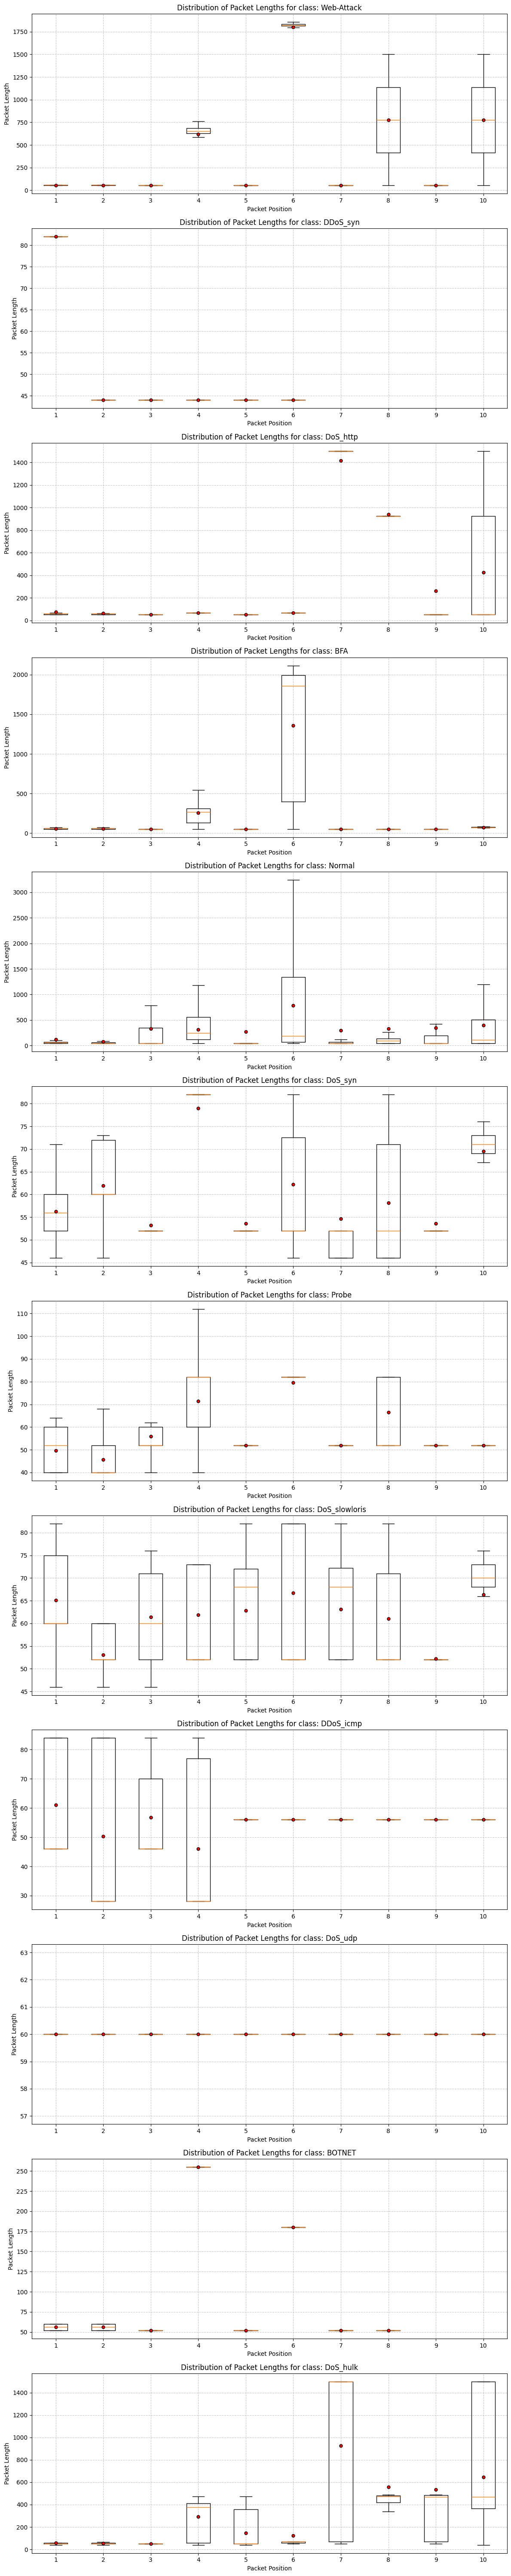

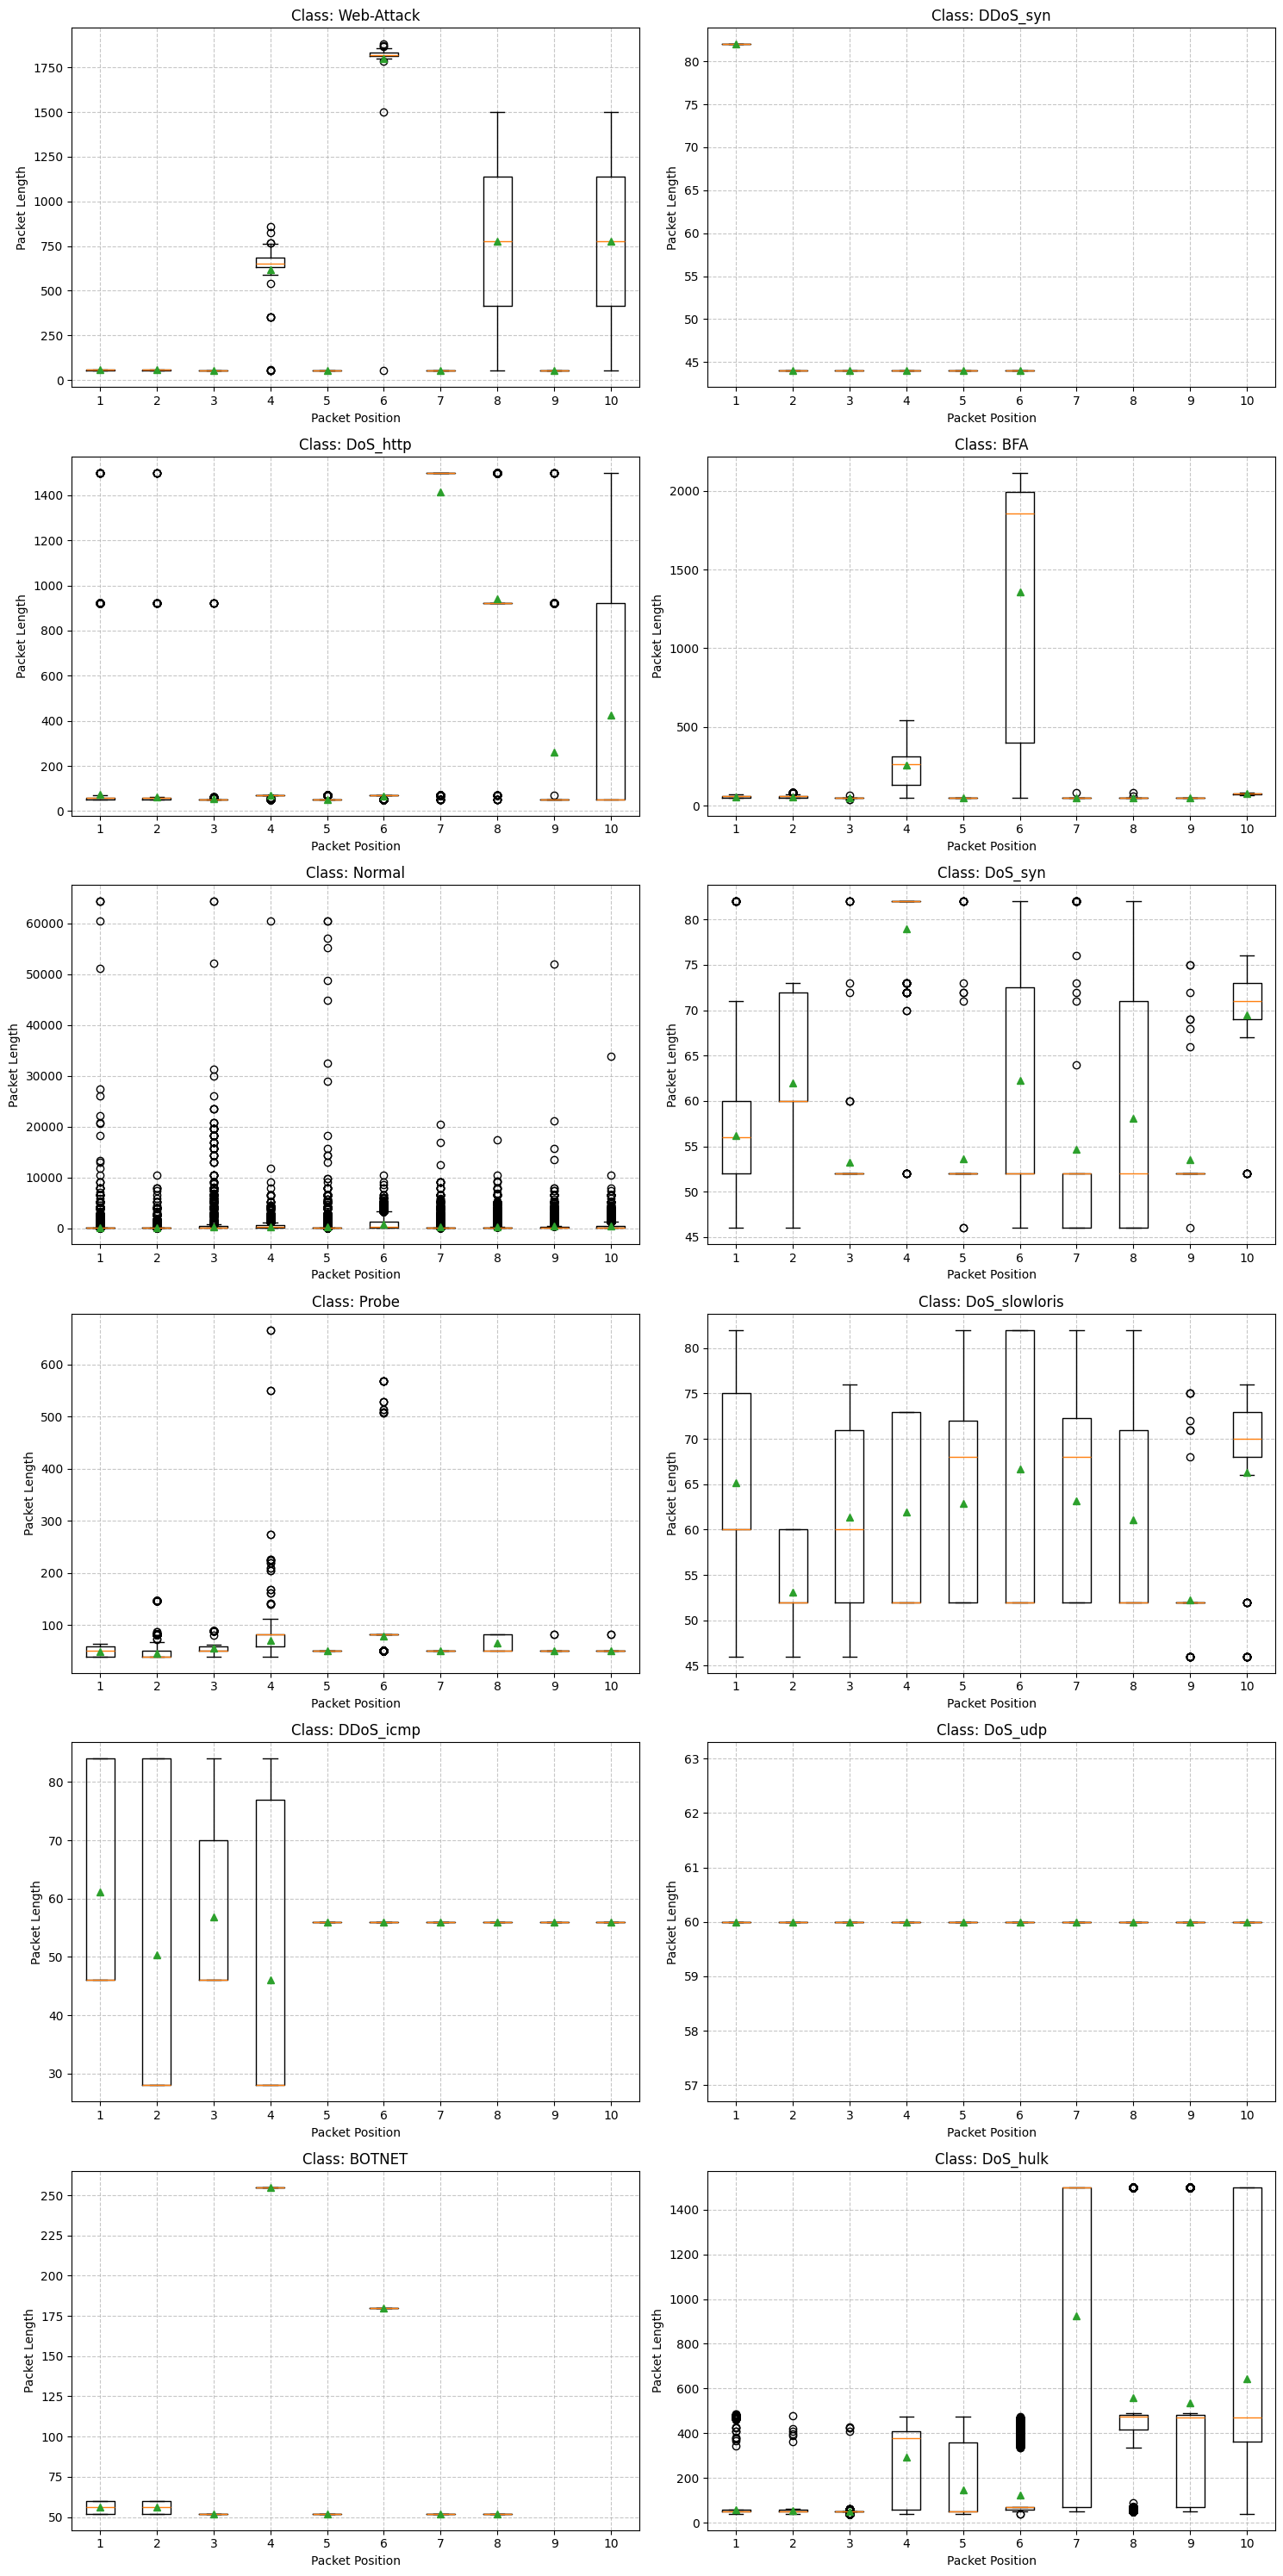

In [ ]:
# Create boxplots for each LABEL_FULL class showing distribution of packet lengths for first 10 packets

# Define the number of packets to analyze
num_packets = 10

# Preprocess the PL column to ensure all arrays have exactly 10 elements
def preprocess_packet_lengths(df, max_length=10):
    """Preprocesses the PL column to ensure each array has exactly max_length elements.
    Fills with NaN if the array is shorter than max_length."""

    def pad_or_truncate(pl_array):
        if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
            return np.full(max_length, np.nan)

        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length:
            return pl_array[:max_length]  # Truncate if longer
        else:
            return np.pad(pl_array, (0, max_length - len(pl_array)),
                          constant_values=np.nan)  # Pad with NaN if shorter

    return df['PL'].apply(pad_or_truncate)

# Create a list to store processed arrays for each row
processed_arrays = preprocess_packet_lengths(df)

# Create a DataFrame where each row is a flow and each column is a packet position
df_packets = pd.DataFrame(processed_arrays.tolist(),
                         columns=[f'Packet_{i+1}' for i in range(num_packets)],
                         index=df.index)

# Add the class label to the DataFrame
df_packets['LABEL_FULL'] = df['LABEL_FULL']

# Get unique class labels
unique_classes = df['LABEL_FULL'].unique()

# Set up the figure for subplots - one plot per class
num_classes = len(unique_classes)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 5 * num_classes))

# If there's only one class, make axes into a list for consistent handling
if num_classes == 1:
    axes = [axes]

# Create a boxplot for each class
for i, class_label in enumerate(unique_classes):
    # Filter data for this class
    class_data = df_packets[df_packets['LABEL_FULL'] == class_label].iloc[:, :num_packets]

    # Get data for boxplot - each column becomes a box
    data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

    # Create boxplot
    axes[i].boxplot(data_to_plot, showmeans=True, meanprops={'marker':'o',
                                                 'markerfacecolor':'red',
                                                 'markeredgecolor':'black',
                                                'markersize':5},
                                                showfliers=False)

    axes[i].set_title(f'Distribution of Packet Lengths for class: {class_label}')
    axes[i].set_xlabel('Packet Position')
    axes[i].set_ylabel('Packet Length')
    axes[i].set_xticks(range(1, num_packets + 1))
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('packet_length_distributions_by_class.png')
plt.show()

# For better visualization especially with many classes, we can also create
# a grid of subplots (optimize layout based on number of classes)
num_classes = len(unique_classes)
max_cols = 2  # Maximum number of columns in the grid
num_rows = (num_classes + max_cols - 1) // max_cols  # Calculate needed rows

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, 5 * num_rows))
# Flatten axes array for easier indexing
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Create a boxplot for each class in the grid layout
for i, class_label in enumerate(unique_classes):
    if i < len(axes):
        # Filter data for this class
        class_data = df_packets[df_packets['LABEL_FULL'] == class_label].iloc[:, :num_packets]

        # Get data for boxplot
        data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

        # Create boxplot
        axes[i].boxplot(data_to_plot, showmeans=True)
        axes[i].set_title(f'Class: {class_label}')
        axes[i].set_xlabel('Packet Position')
        axes[i].set_ylabel('Packet Length')
        axes[i].set_xticks(range(1, num_packets + 1))
        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('packet_length_grid_by_class.png')
plt.show()

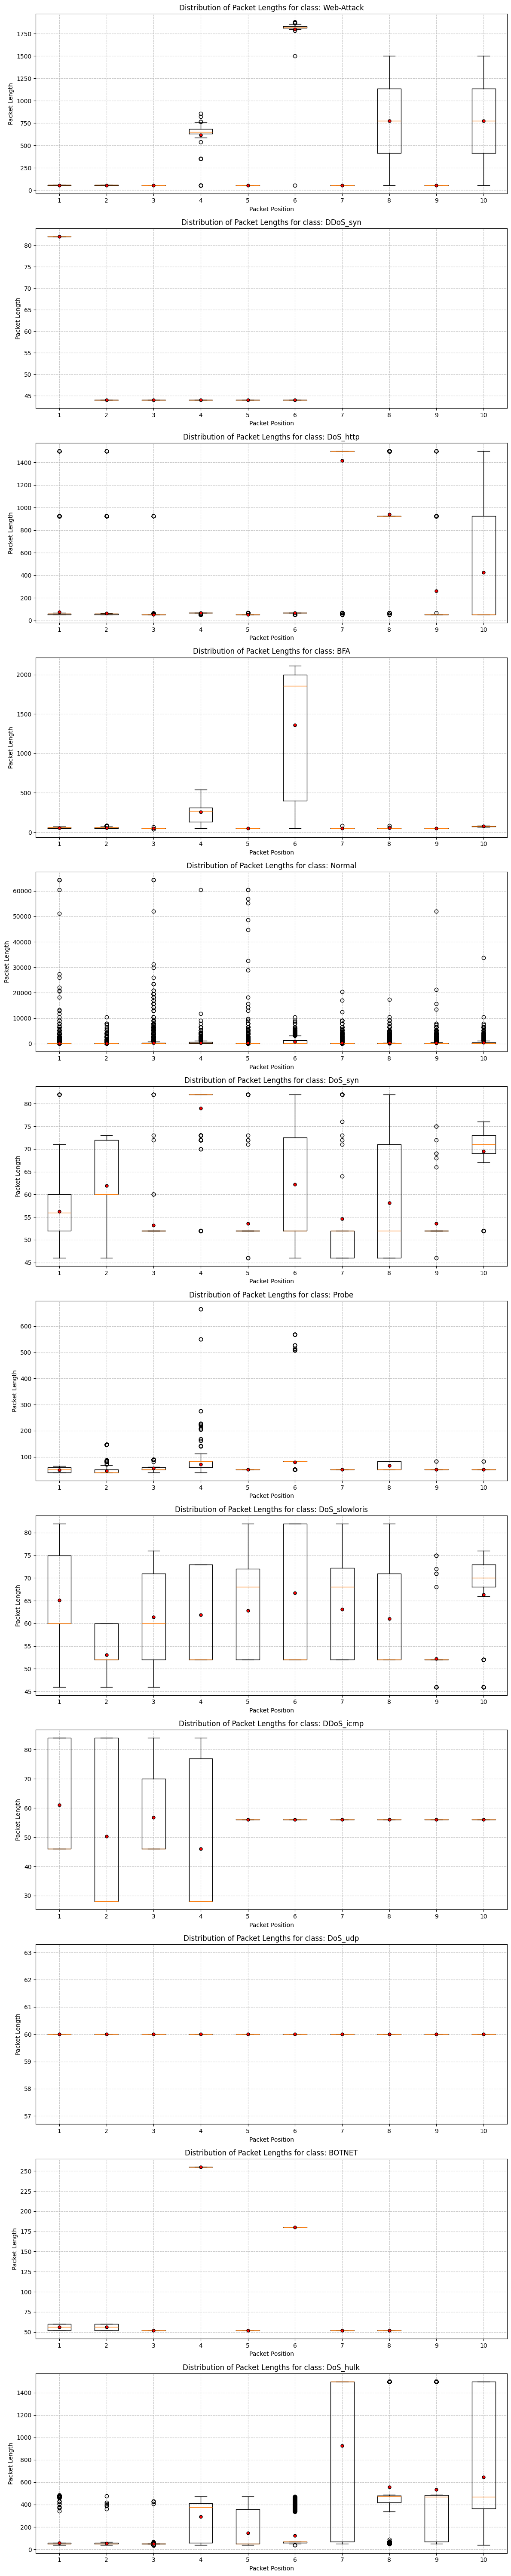

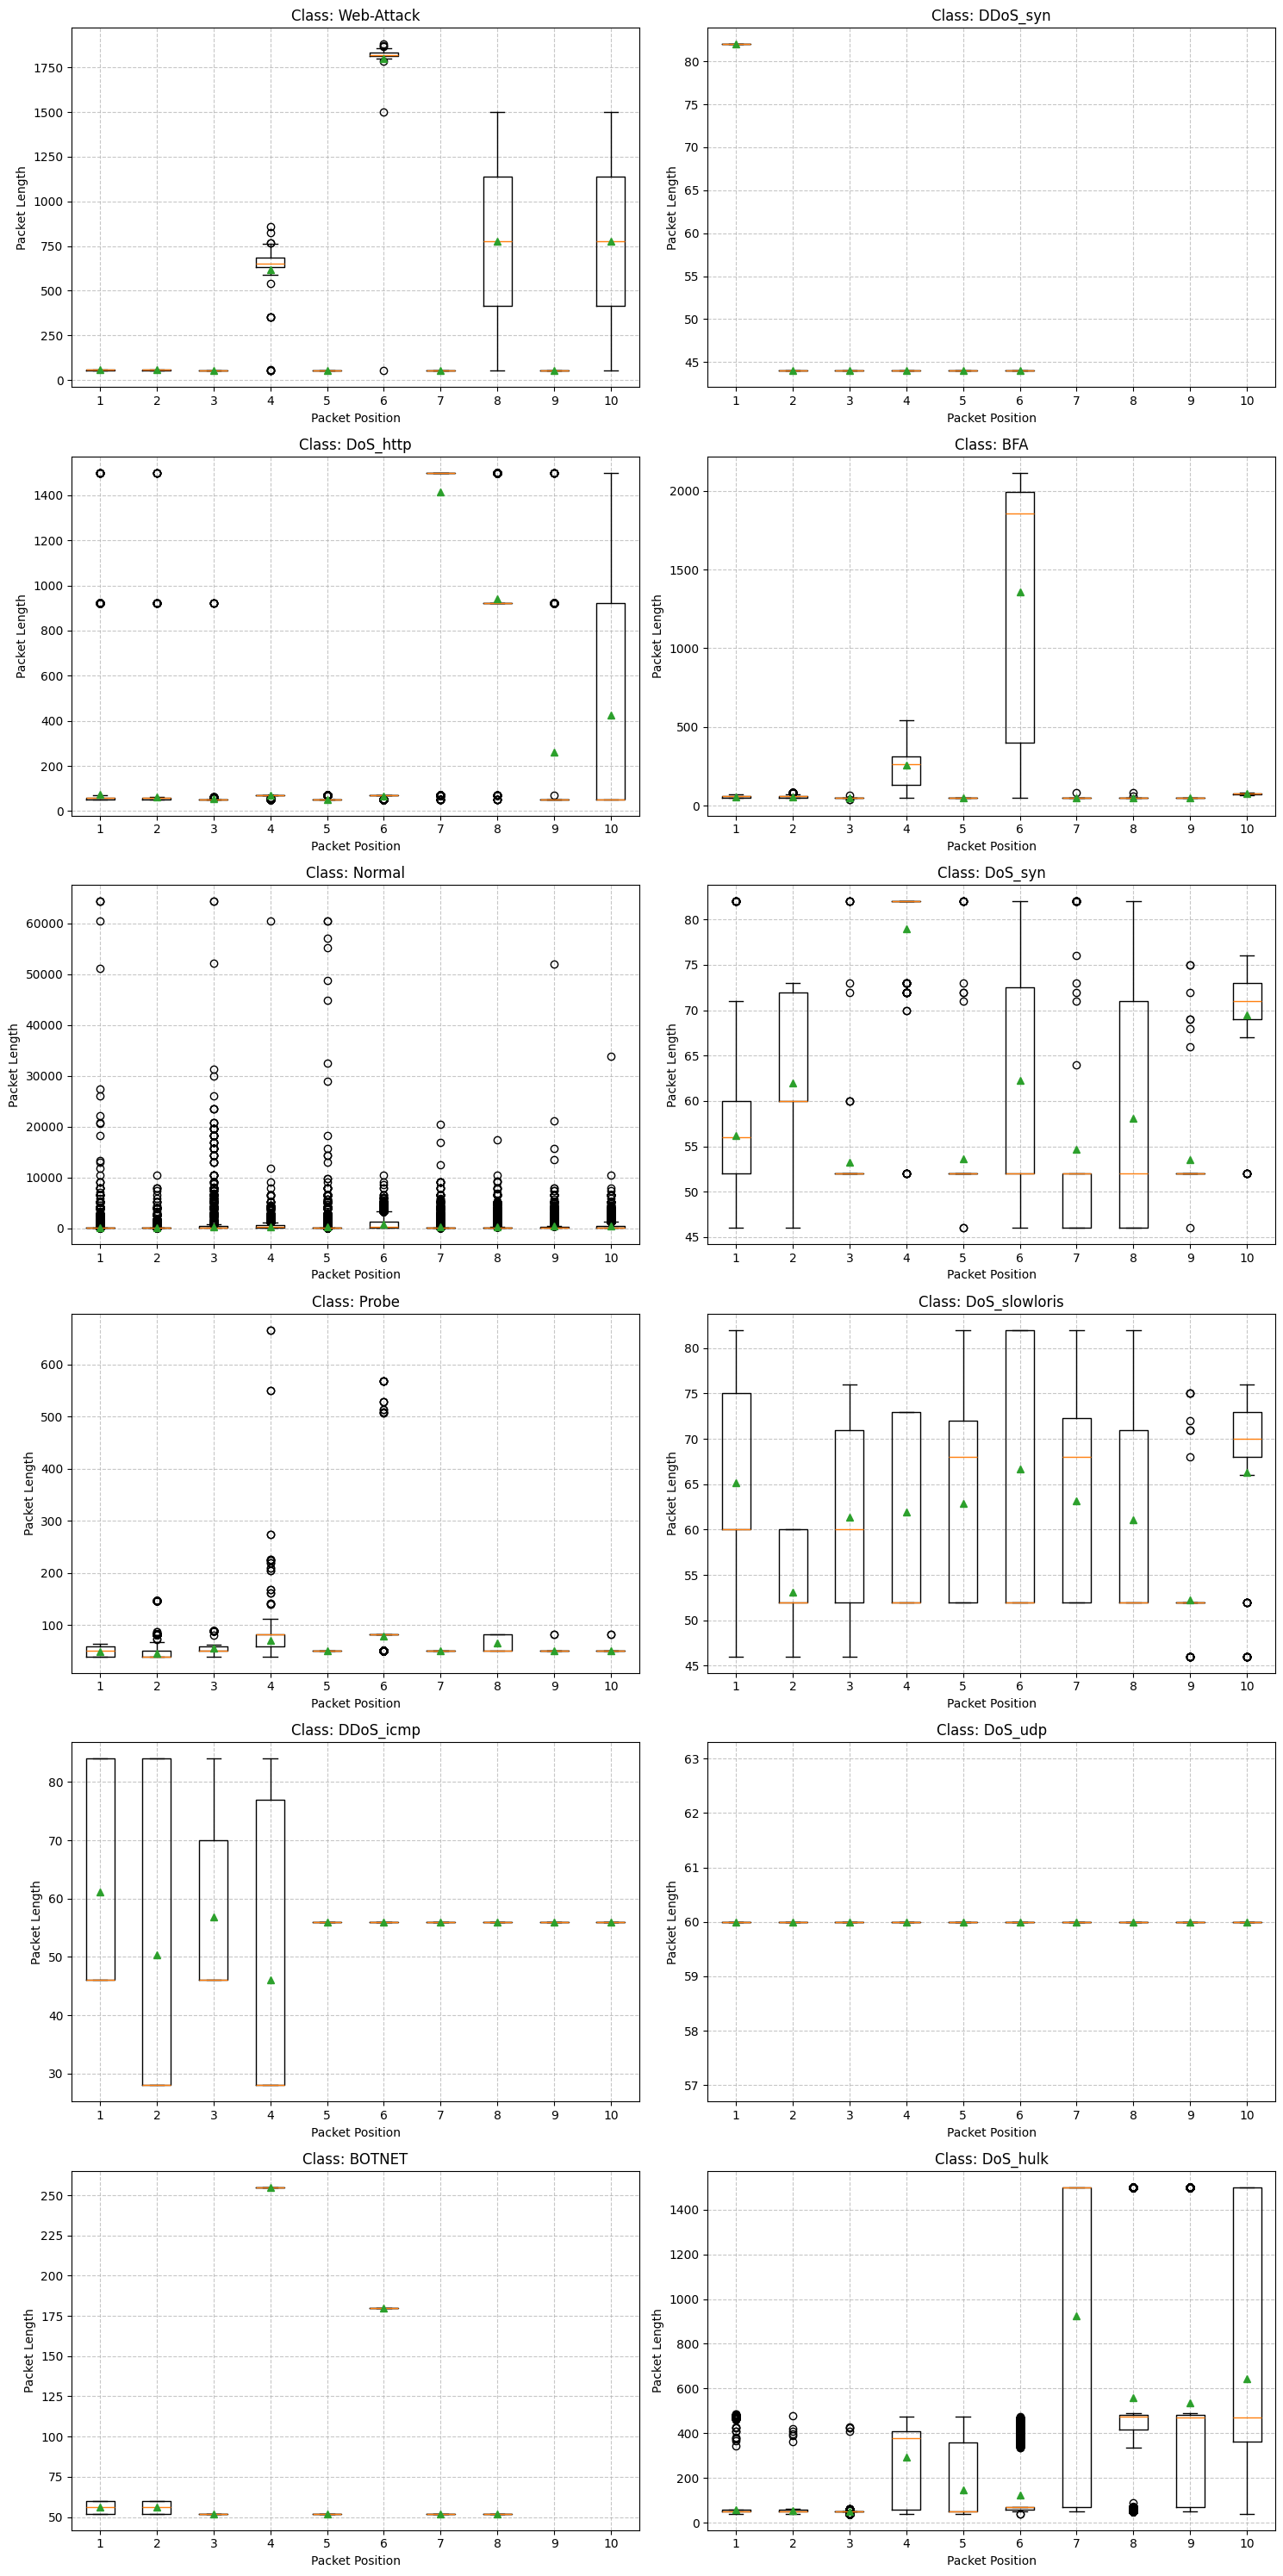

In [ ]:
# Create boxplots for each LABEL_FULL class showing distribution of packet lengths for first 10 packets

# Define the number of packets to analyze
num_packets = 10

# Preprocess the PL column to ensure all arrays have exactly 10 elements
def preprocess_packet_lengths(df, max_length=10):
    """Preprocesses the PL column to ensure each array has exactly max_length elements.
    Fills with NaN if the array is shorter than max_length."""

    def pad_or_truncate(pl_array):
        if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
            return np.full(max_length, np.nan)

        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length:
            return pl_array[:max_length]  # Truncate if longer
        else:
            return np.pad(pl_array, (0, max_length - len(pl_array)),
                          constant_values=np.nan)  # Pad with NaN if shorter

    return df['PL'].apply(pad_or_truncate)

# Create a list to store processed arrays for each row
processed_arrays = preprocess_packet_lengths(df)

# Create a DataFrame where each row is a flow and each column is a packet position
df_packets = pd.DataFrame(processed_arrays.tolist(),
                         columns=[f'Packet_{i+1}' for i in range(num_packets)],
                         index=df.index)

# Add the class label to the DataFrame
df_packets['LABEL_FULL'] = df['LABEL_FULL']

# Get unique class labels
unique_classes = df['LABEL_FULL'].unique()

# Set up the figure for subplots - one plot per class
num_classes = len(unique_classes)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 5 * num_classes))

# If there's only one class, make axes into a list for consistent handling
if num_classes == 1:
    axes = [axes]

# Create a boxplot for each class
for i, class_label in enumerate(unique_classes):
    # Filter data for this class
    class_data = df_packets[df_packets['LABEL_FULL'] == class_label].iloc[:, :num_packets]

    # Get data for boxplot - each column becomes a box
    data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

    # Create boxplot
    axes[i].boxplot(data_to_plot, showmeans=True, meanprops={'marker':'o',
                                                 'markerfacecolor':'red',
                                                 'markeredgecolor':'black',
                                                'markersize':5})

    axes[i].set_title(f'Distribution of Packet Lengths for class: {class_label}')
    axes[i].set_xlabel('Packet Position')
    axes[i].set_ylabel('Packet Length')
    axes[i].set_xticks(range(1, num_packets + 1))
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('packet_length_distributions_by_class.png')
plt.show()

# For better visualization especially with many classes, we can also create
# a grid of subplots (optimize layout based on number of classes)
num_classes = len(unique_classes)
max_cols = 2  # Maximum number of columns in the grid
num_rows = (num_classes + max_cols - 1) // max_cols  # Calculate needed rows

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, 5 * num_rows))
# Flatten axes array for easier indexing
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Create a boxplot for each class in the grid layout
for i, class_label in enumerate(unique_classes):
    if i < len(axes):
        # Filter data for this class
        class_data = df_packets[df_packets['LABEL_FULL'] == class_label].iloc[:, :num_packets]

        # Get data for boxplot
        data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

        # Create boxplot
        axes[i].boxplot(data_to_plot, showmeans=True)
        axes[i].set_title(f'Class: {class_label}')
        axes[i].set_xlabel('Packet Position')
        axes[i].set_ylabel('Packet Length')
        axes[i].set_xticks(range(1, num_packets + 1))
        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('packet_length_grid_by_class.png')
plt.show()

Packet 1 - Count: 39296, Mean: 119.10, Median: 60.00, % >= 1500: 0.80%
Packet 2 - Count: 39296, Mean: 78.90, Median: 46.00, % >= 1500: 0.40%
Packet 3 - Count: 30604, Mean: 327.19, Median: 46.00, % >= 1500: 3.66%
Packet 4 - Count: 26746, Mean: 316.60, Median: 248.00, % >= 1500: 0.64%
Packet 5 - Count: 15479, Mean: 273.73, Median: 46.00, % >= 1500: 4.16%
Packet 6 - Count: 15022, Mean: 784.28, Median: 185.00, % >= 1500: 16.60%
Packet 7 - Count: 14321, Mean: 297.25, Median: 40.00, % >= 1500: 5.26%
Packet 8 - Count: 14036, Mean: 326.53, Median: 91.00, % >= 1500: 6.38%
Packet 9 - Count: 13303, Mean: 347.11, Median: 46.00, % >= 1500: 4.47%
Packet 10 - Count: 13210, Mean: 396.12, Median: 115.00, % >= 1500: 5.53%


<ipython-input-15-dc24108a292c>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


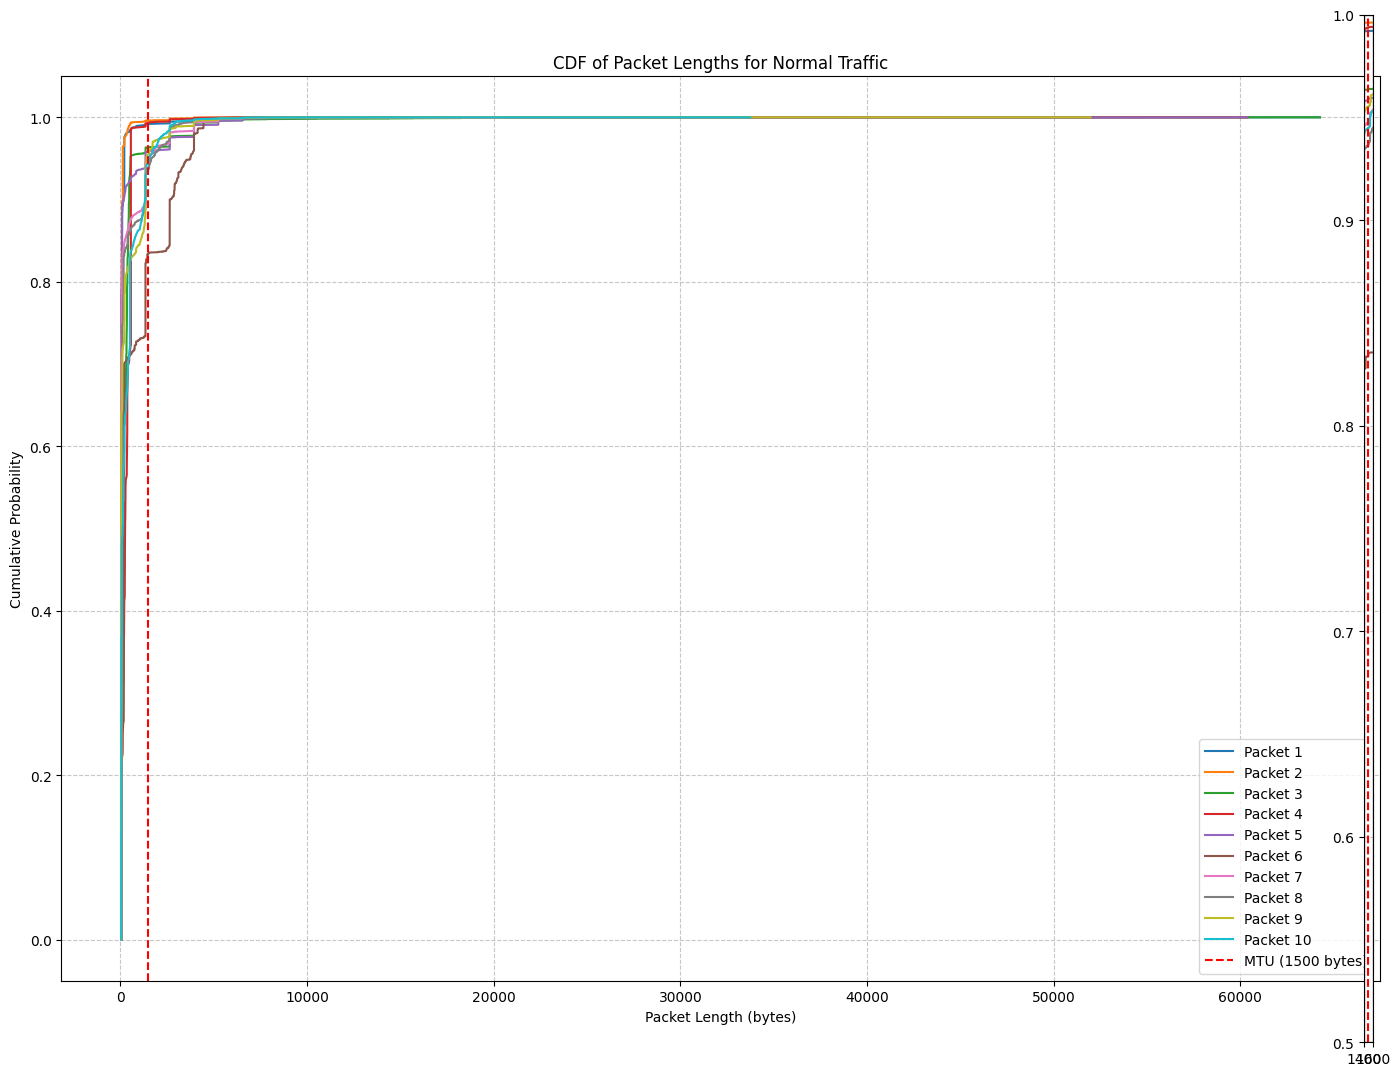

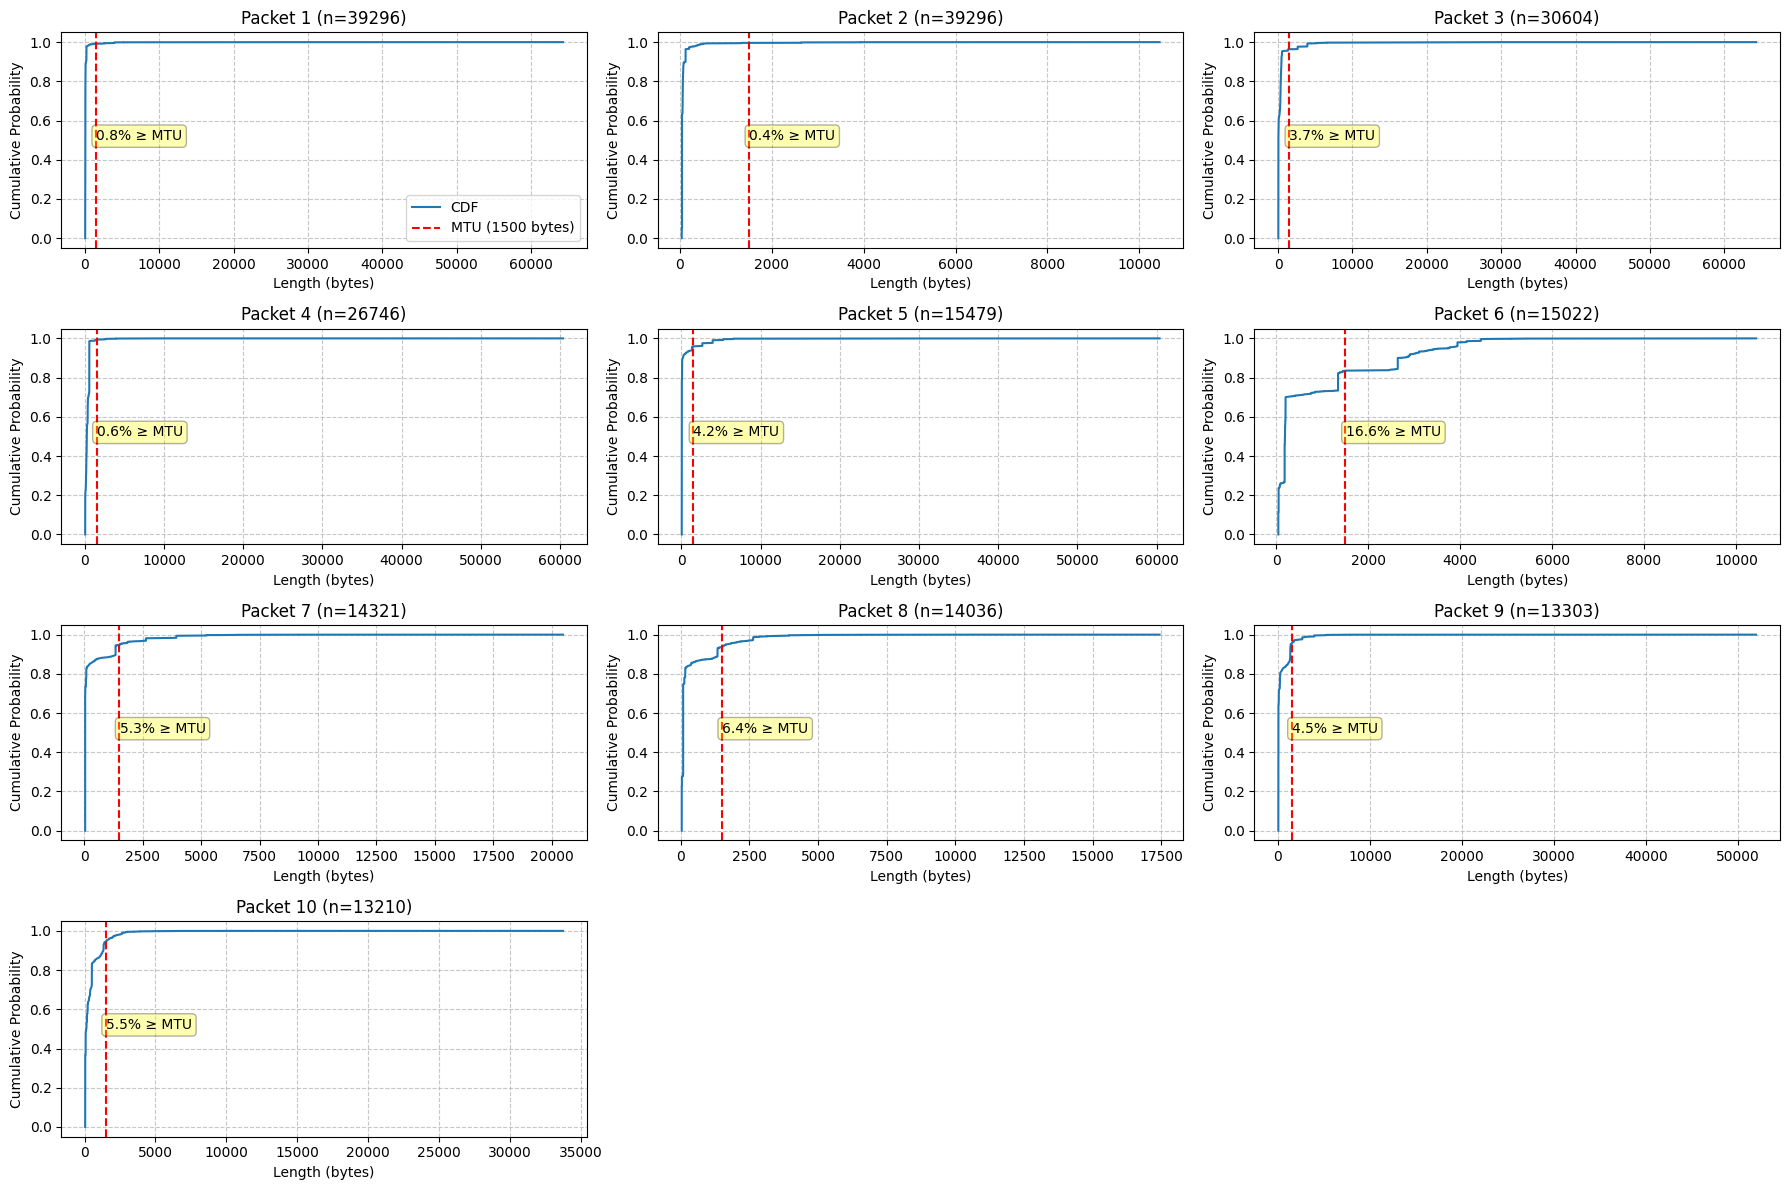

In [ ]:
# Plot CDF of packet lengths for 'Normal' class with MTU line

# Define the number of packets to analyze
num_packets = 10

# Filter the dataset to get only the 'Normal' class
df_normal = df[df['LABEL_FULL'] == 'Normal'].copy()

# Preprocess the PL column to get the first 10 packets
def get_packet_lengths(pl_array, max_length=10):
    if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
        return np.full(max_length, np.nan)

    pl_array = np.array(pl_array, dtype=float)
    if len(pl_array) > max_length:
        return pl_array[:max_length]  # Truncate if longer
    else:
        return np.pad(pl_array, (0, max_length - len(pl_array)),
                      constant_values=np.nan)  # Pad with NaN if shorter

# Process arrays
processed_arrays = df_normal['PL'].apply(get_packet_lengths)

# Create a DataFrame where each row is a flow and each column is a packet position
df_normal_packets = pd.DataFrame(processed_arrays.tolist(),
                     columns=[f'Packet_{i+1}' for i in range(num_packets)],
                     index=df_normal.index)

# Create a figure for the CDF plots
plt.figure(figsize=(14, 10))

# Plot CDF for each packet position
for i in range(num_packets):
    # Get data for current packet position
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    # Calculate the proportional ranks (CDF y-values)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot the CDF
    plt.plot(sorted_data, y_values, label=f'Packet {i+1}')

    # Print statistics about this packet position
    print(f"Packet {i+1} - Count: {len(data)}, Mean: {data.mean():.2f}, Median: {data.median():.2f}, % >= 1500: {(data >= 1500).mean()*100:.2f}%")

# Add a vertical line at MTU=1500
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Add labels and title
plt.title('CDF of Packet Lengths for Normal Traffic')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add zoom inset for the region around MTU=1500
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(plt.gca(), 2.5, loc='center right')  # zoom factor: 2.5

# Plot same data in the inset
for i in range(num_packets):
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axins.plot(sorted_data, y_values)

# Add the vertical line in the inset too
axins.axvline(x=1500, color='red', linestyle='--')

# Set the limits for the inset
axins.set_xlim(1400, 1600)  # x-limits around MTU
axins.set_ylim(0.5, 1.0)    # Adjust as needed to focus on the interesting part
axins.grid(True, linestyle='--', alpha=0.7)

# Mark the region of the inset
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('normal_packet_length_cdf.png')
plt.show()

# Now create a detailed plot focusing on a single figure with subplots for each packet position
plt.figure(figsize=(18, 12))

# Calculate number of rows and columns for the subplot grid
rows = int(np.ceil(num_packets / 3))
cols = min(num_packets, 3)

# Create subplots for each packet position
for i in range(num_packets):
    plt.subplot(rows, cols, i+1)

    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot CDF
    plt.plot(sorted_data, y_values, label='CDF')

    # Add vertical line at MTU
    plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

    # Annotate the percentage of packets with size >= MTU
    mtu_pct = (data >= 1500).mean() * 100
    plt.annotate(f"{mtu_pct:.1f}% ≥ MTU",
                 xy=(1510, 0.5),
                 xytext=(1510, 0.5),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

    plt.title(f'Packet {i+1} (n={len(data)})')
    plt.xlabel('Length (bytes)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend if it's the first subplot
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig('normal_packet_length_cdf_detailed.png')
plt.show()

Packet 1 - Count: 5302, Mean: 74.08, Median: 60.00, % >= 1500: 0.34%
Packet 2 - Count: 5302, Mean: 61.80, Median: 60.00, % >= 1500: 0.11%
Packet 3 - Count: 5301, Mean: 53.33, Median: 52.00, % >= 1500: 0.00%
Packet 4 - Count: 2662, Mean: 68.45, Median: 69.00, % >= 1500: 0.00%
Packet 5 - Count: 2655, Mean: 52.98, Median: 52.00, % >= 1500: 0.00%
Packet 6 - Count: 2654, Mean: 68.16, Median: 69.00, % >= 1500: 0.00%
Packet 7 - Count: 2642, Mean: 1414.25, Median: 1500.00, % >= 1500: 94.02%
Packet 8 - Count: 2642, Mean: 939.59, Median: 923.00, % >= 1500: 4.73%
Packet 9 - Count: 442, Mean: 259.49, Median: 52.00, % >= 1500: 3.17%
Packet 10 - Count: 67, Mean: 424.61, Median: 52.00, % >= 1500: 1.49%


<ipython-input-16-9d95da8f2009>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


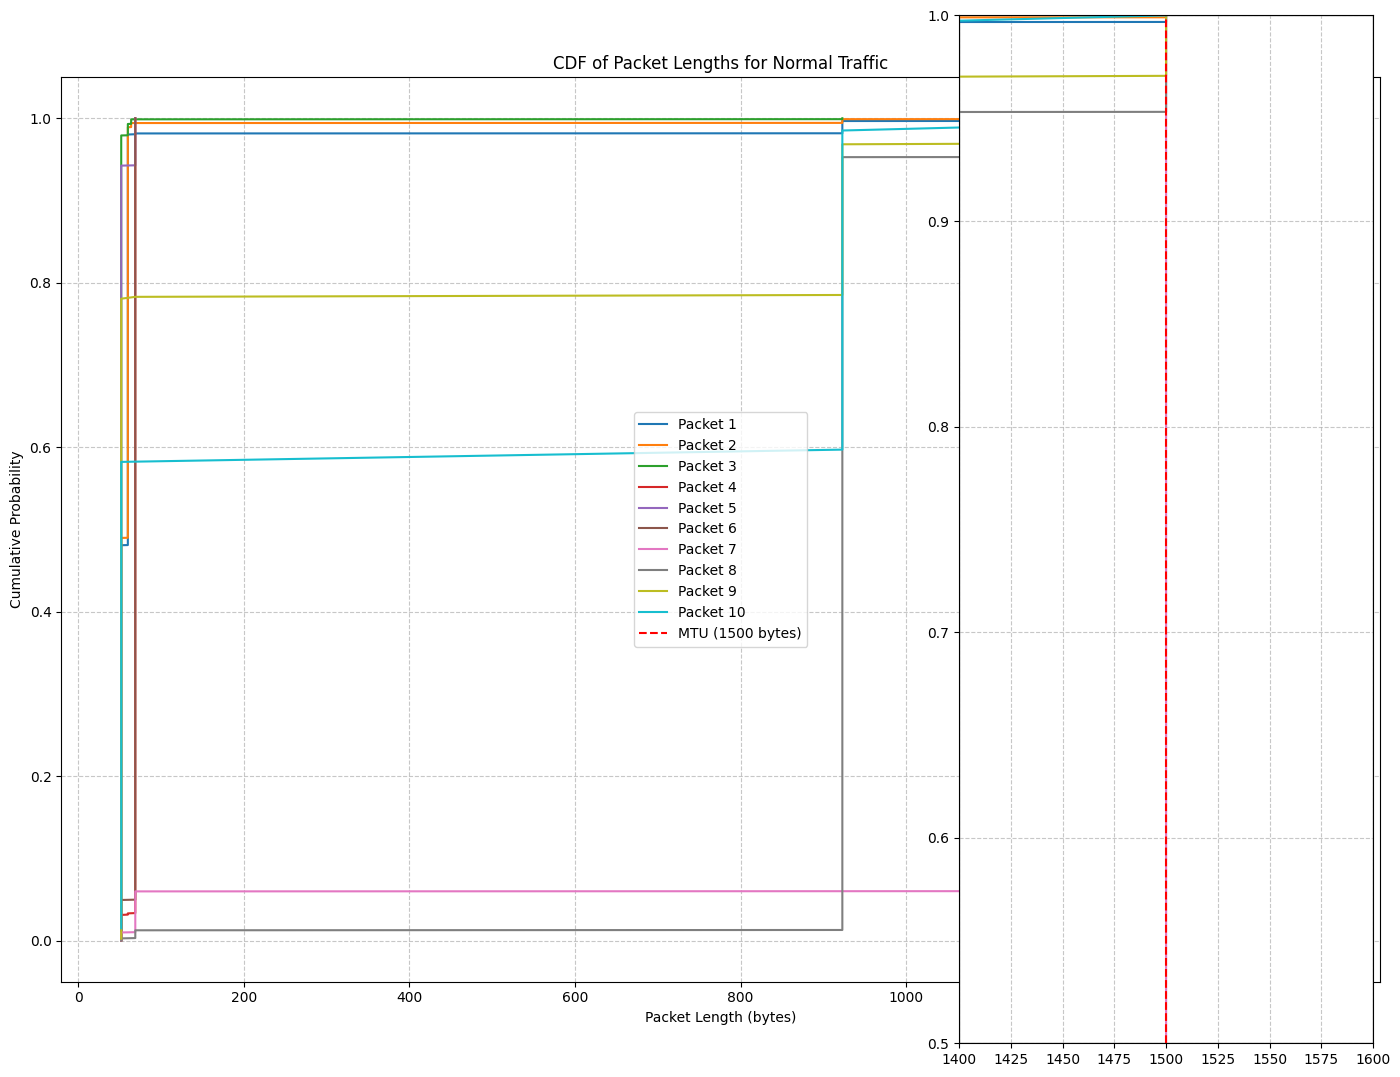

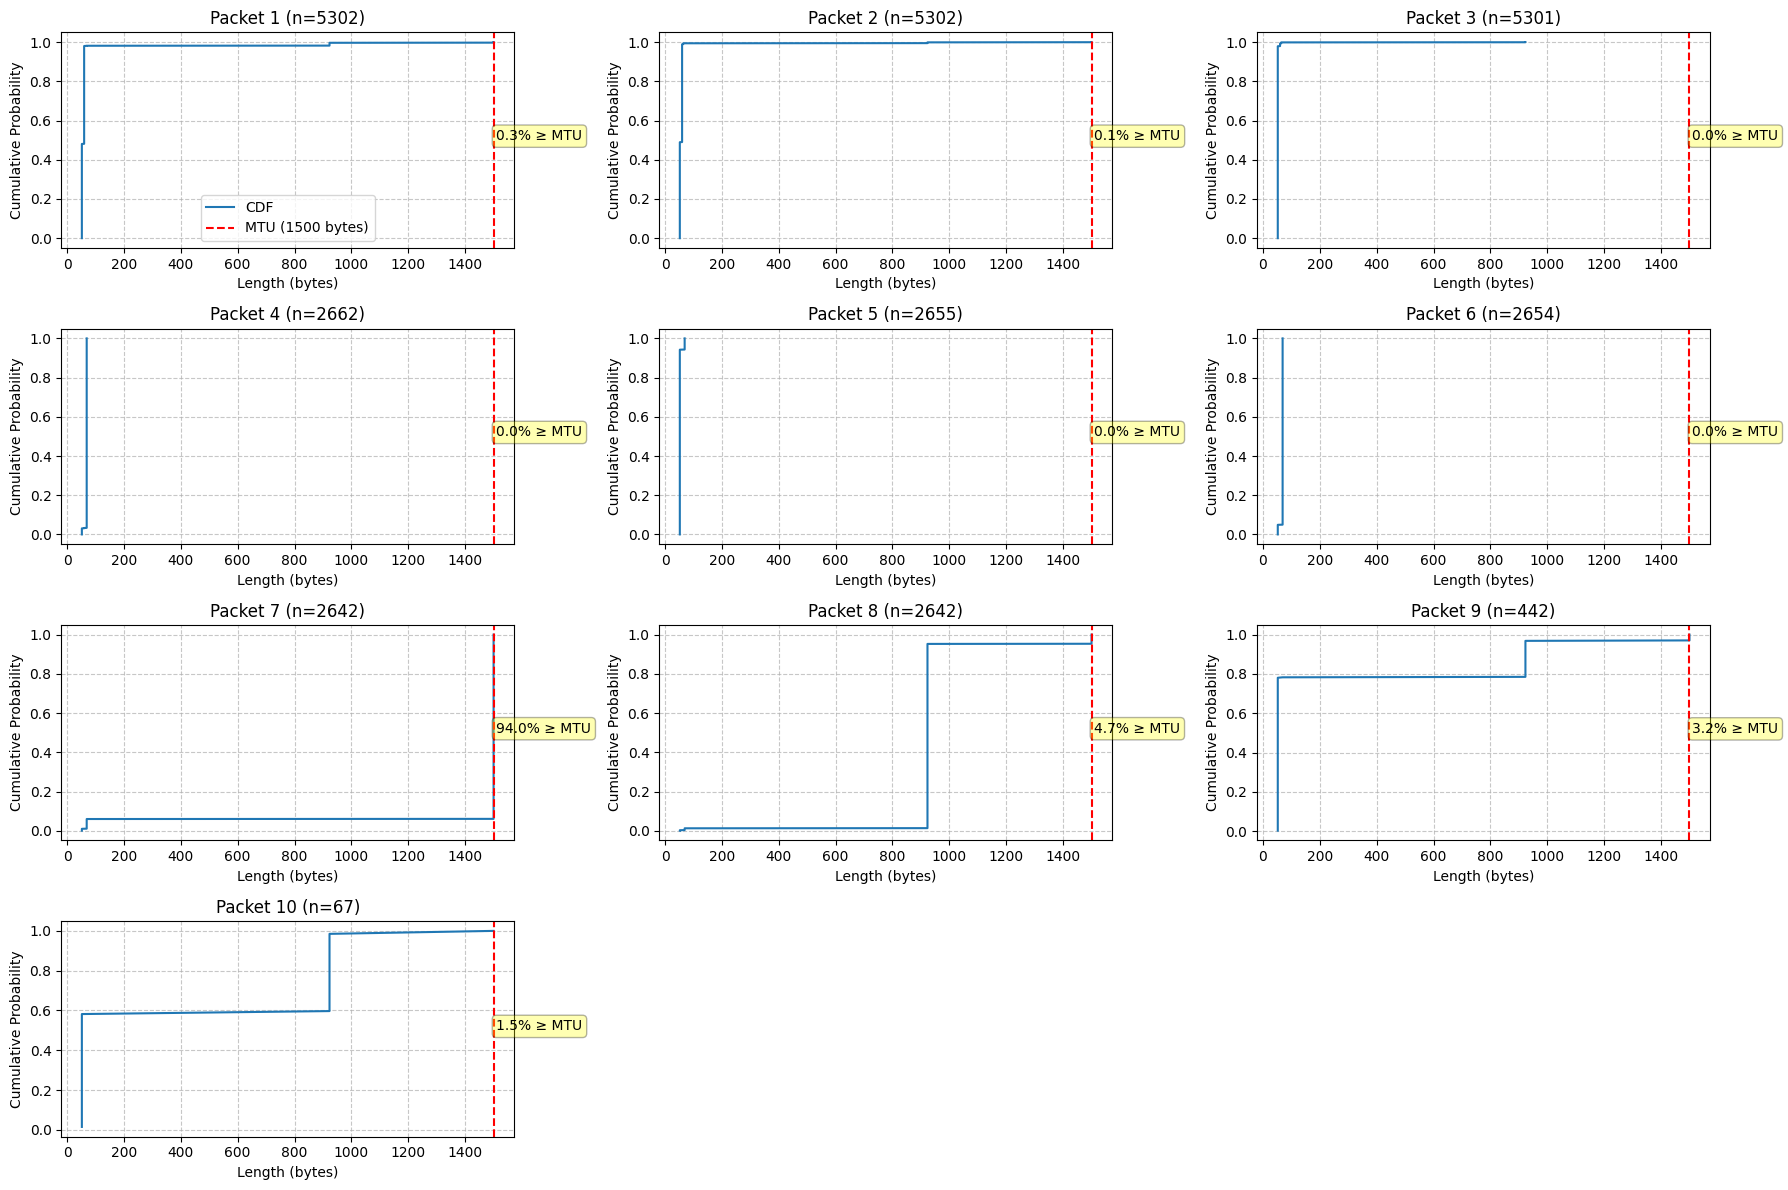

In [ ]:
# Plot CDF of packet lengths for 'Normal' class with MTU line

# Define the number of packets to analyze
num_packets = 10

# Filter the dataset to get only the 'DOS_http' class
df_normal = df[df['LABEL_FULL'] == 'DoS_http'].copy()

# Preprocess the PL column to get the first 10 packets
def get_packet_lengths(pl_array, max_length=10):
    if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
        return np.full(max_length, np.nan)

    pl_array = np.array(pl_array, dtype=float)
    if len(pl_array) > max_length:
        return pl_array[:max_length]  # Truncate if longer
    else:
        return np.pad(pl_array, (0, max_length - len(pl_array)),
                      constant_values=np.nan)  # Pad with NaN if shorter

# Process arrays
processed_arrays = df_normal['PL'].apply(get_packet_lengths)

# Create a DataFrame where each row is a flow and each column is a packet position
df_normal_packets = pd.DataFrame(processed_arrays.tolist(),
                     columns=[f'Packet_{i+1}' for i in range(num_packets)],
                     index=df_normal.index)

# Create a figure for the CDF plots
plt.figure(figsize=(14, 10))

# Plot CDF for each packet position
for i in range(num_packets):
    # Get data for current packet position
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    # Calculate the proportional ranks (CDF y-values)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot the CDF
    plt.plot(sorted_data, y_values, label=f'Packet {i+1}')

    # Print statistics about this packet position
    print(f"Packet {i+1} - Count: {len(data)}, Mean: {data.mean():.2f}, Median: {data.median():.2f}, % >= 1500: {(data >= 1500).mean()*100:.2f}%")

# Add a vertical line at MTU=1500
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Add labels and title
plt.title('CDF of Packet Lengths for Normal Traffic')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add zoom inset for the region around MTU=1500
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(plt.gca(), 2.5, loc='center right')  # zoom factor: 2.5

# Plot same data in the inset
for i in range(num_packets):
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axins.plot(sorted_data, y_values)

# Add the vertical line in the inset too
axins.axvline(x=1500, color='red', linestyle='--')

# Set the limits for the inset
axins.set_xlim(1400, 1600)  # x-limits around MTU
axins.set_ylim(0.5, 1.0)    # Adjust as needed to focus on the interesting part
axins.grid(True, linestyle='--', alpha=0.7)

# Mark the region of the inset
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('normal_packet_length_cdf.png')
plt.show()

# Now create a detailed plot focusing on a single figure with subplots for each packet position
plt.figure(figsize=(18, 12))

# Calculate number of rows and columns for the subplot grid
rows = int(np.ceil(num_packets / 3))
cols = min(num_packets, 3)

# Create subplots for each packet position
for i in range(num_packets):
    plt.subplot(rows, cols, i+1)

    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot CDF
    plt.plot(sorted_data, y_values, label='CDF')

    # Add vertical line at MTU
    plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

    # Annotate the percentage of packets with size >= MTU
    mtu_pct = (data >= 1500).mean() * 100
    plt.annotate(f"{mtu_pct:.1f}% ≥ MTU",
                 xy=(1510, 0.5),
                 xytext=(1510, 0.5),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

    plt.title(f'Packet {i+1} (n={len(data)})')
    plt.xlabel('Length (bytes)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend if it's the first subplot
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig('normal_packet_length_cdf_detailed.png')
plt.show()
